# Маркетинговый анализ развлекательного приложения Procrastinate Pro+

***Описание проекта***  

Необходимо провести маркетинговый анализ развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Для анализа были предоставлены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях (файл `/datasets/visits_info_short.csv`), выгрузка их покупок за этот период (файл `/datasets/orders_info_short.csv`), рекламные расходы (`/datasets/costs_info_short.csv`). Необходимо определить откуда приходят пользователи и какими устройствами они пользуются, сколько стоит привлечение пользователей из различных рекламных каналов, сколько денег приносит каждый клиент, когда расходы на привлечение клиента окупаются, какие факторы мешают привлечению клиентов. Дата проведения исследвания 1 ноября 2019 года.

***Цель исследования :***  
Найти причины убыточности маркетинговых кампаний и дать рекоммендации по выходу в плюс.  
    
Ход исследования:
    
Обзор данных.

Предобработка данных.
    
Функции расчета показателей.

Исследовательский анализ данных:

    •	создание профилей пользователей. Определите минимальную и максимальную даты привлечения пользователей.
    •	анализ пользователей в разрезе стран.
    •	анализ пользователей в разрезе устройств.
    •	изучение рекламных источников


Маркетинг:

    •	общая сумму расходов на маркетинг.
    •	распределены трат по рекламным источникам.
    •	динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
    •	средняя стоимость привлечения одного пользователя (CAC) из каждого источника.


Оценка окупаемости рекламы для привлечения пользователей с помощью LTV, ROI и CAC:
    
    •	окупаемость рекламы (показатели LTV, CAC, ROI)
    •	оценка конверсии и удержания

Выводы и рекомендации



### Обзор данных

In [1]:
#Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#настраиваем отображение колонок (полностью)
pd.set_option('display.max_columns', None)
#настраиваем отображение формата значений типа float
pd.options.display.float_format = '{:,.2f}'.format

Загрузка данных

In [3]:
try:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv')
    )


except:
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')
    )

Посмотрим какие данные содержатся в таблицах, их типы и сделаем обзор данных на случайных 10 стороках.

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
visits.sample(10)

User Id         Region   Device             Channel  \
87687   733121724937  United States      Mac             organic   
55760    39932117590  United States  Android             organic   
110632  399326235734  United States   iPhone              TipTop   
70009   894577779352  United States   iPhone            FaceBoom   
82242   173689373927  United States   iPhone             organic   
17834   435514686182  United States   iPhone             organic   
173171  984355201519  United States  Android            FaceBoom   
7090    788481732557  United States       PC        MediaTornado   
165476  442715004889  United States       PC              TipTop   
253906  297340964942         France  Android  OppleCreativeMedia   

              Session Start          Session End  
87687   2019-07-27 22:45:43  2019-07-27 22:56:09  
55760   2019-06-27 10:38:14  2019-06-27 10:50:58  
110632  2019-08-16 11:57:03  2019-08-16 11:57:50  
70009   2019-07-08 08:31:28  2019-07-08 09:29:36  
82242   2019-07-21 01:07:31  2019-07-21 02:12:21  
17834   2019-05-19 19:32:47  2019-05-19 19:33:25  
173171  2019-10-04 09:53:39  2019-10-04 10:06:29  
7090    2019-05-09 02:40:54  2019-05-09 02:50:46  
165476  2019-09-29 22:28:28  2019-09-29 22:31:58  
253906  2019-08-02 02:33:15  2019-08-02 02:49:42

Таблица `visits` содержит 309901 наблюдение о сессиях проведенных пользовтелями в приложении.Включает 6 признаков:  
`User Id` — уникальный идентификатор пользователя  
`Region` - страна пользователя  
`Device` — категория устройства пользователя  
`Channel` — идентификатор рекламного источника, из которого пришел пользователь  
`Session start` — дата и время начала сессии  
`Session End` — дата и время окончания сессии

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
orders.sample(10)

User Id             Event Dt  Revenue
11830   63589386927  2019-08-10 01:36:45     4.99
18228  641114493800  2019-09-16 02:24:40     4.99
15450  713241429975  2019-08-31 00:15:28     4.99
467    883059347040  2019-05-11 09:43:19     4.99
9575   712044672306  2019-07-27 14:59:07     4.99
26748   17768162466  2019-10-25 10:45:25     4.99
4050   965069106536  2019-06-19 10:07:41     4.99
31943  975710979943  2019-07-29 19:22:58     4.99
8770   241049553912  2019-07-21 21:46:42     4.99
17874  123643365833  2019-09-14 00:03:38     4.99

Таблица `orders` содержит 40212 наблюдений о покупках клиентов. В нее входит:  
`User Id` — уникальный id пользователя, который сделал заказ  
`Event Dt`— дата и время покупки  
`Revenue` — доход  


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [9]:
costs.sample(10)

dt             Channel  costs
1764  2019-09-22      lambdaMediaAds   6.40
1301  2019-06-11  OppleCreativeMedia  10.25
783   2019-07-03             YRabbit   2.52
491   2019-09-09      RocketSuperAds   4.23
151   2019-09-29            FaceBoom 290.40
589   2019-06-19              TipTop 186.20
1691  2019-07-11      lambdaMediaAds   4.80
1177  2019-08-06             LeapBob  15.33
1010  2019-08-19          AdNonSense  21.00
1757  2019-09-15      lambdaMediaAds   7.20

Таблица `costs` содержит 1800 наблюдений о расходах на рекламные кампании. Содержит информацию:  
`Channel` — идентификатор рекламного источника  
`Dt` — дата  
`Costs` — затраты на этот рекламный источник в этот день

#### Вывод

Полученно три таблицы `visits`, `orders`, `costs`. Таблицы содержат информацию о посещениях приложения, покупках и проведенных рекламных кампаниях. Ни одна из таблиц не содержат пропусков. Неоходимо провести предобработку данных: привести названия столбцов к единому стилю, изменить типы данных содержащие даты на datetime, проверить данные наличие дубликатов.

### Предобработка данных.

Для проверки дубликатов создадим функцию, которая будет выводить уникальные значения столбцов

In [10]:
def uni_name(data, col_list):
    for col in col_list:
        print(f'{col} значения: {data[col].sort_values().unique()}')

Приведём названия стобцов к единому стилю, все символы должны находиться в нижнем регистре и слова разделены нижним подчёркиванием и проверим наличие строк-дубликатов.

In [11]:
for i in [visits, orders, costs]:
    i.columns = i.columns.str.lower()
    i.columns = i.columns.str.replace(' ','_')
    print(i.columns)
    print(f'число строк дубликатов: {i.duplicated().sum()}')

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
число строк дубликатов: 0
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
число строк дубликатов: 0
Index(['dt', 'channel', 'costs'], dtype='object')
число строк дубликатов: 0


Имена столбцов приведены к единому стилю, строки-дубликаты не обнаружены.

Проверим наличие неявных дубликатов в столбцах `region`, `device`, `channel` таблицы `visits` и столбце `channel` таблицы `costs` 

In [12]:
uni_name(visits, ['region', 'device', 'channel'])

region значения: ['France' 'Germany' 'UK' 'United States']
device значения: ['Android' 'Mac' 'PC' 'iPhone']
channel значения: ['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds'
 'organic']


In [13]:
uni_name(costs, ['channel'])

channel значения: ['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds']


Неявных дубликатов не обнаружено.

Приведём столбцы, содержащие временные параметры к типу datetime. Для столбца с датой проведения рекламной компании зададим тип date.

In [14]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим изменения

In [15]:
visits.info()
costs.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212

#### Вывод

Названия столбцов приведены к единому стилю, дубликаты явные и неявные не обнаружены, столбцы, содержащие временные данные приведены к типу datetime.

### функции для расчёта и анализа LTV, ROI, удержания и конверсии

***Функция `get_profiles()` для создания профилей пользователей***

In [16]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

***Функция `get_retention()` для подсчёта удержания пользователей Retention Rate***

In [17]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

***Функция `get_conversion()` для подсчёта конверсии Conversion Rate***

In [18]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[]
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

***Функция `get_ltv()` для расчёта LTV и ROI***

In [19]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[]
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

***Функция `filter_data()`  для сглаживания данных***

In [20]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

***Функция `plot_retention()`  для построения графика Retention Rate***

In [21]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

***Функция `plot_conversion()` для построения графика конверсии***

In [22]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, legend= False, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

***Функция `plot_ltv_roi` для визуализации LTV и ROI***

In [23]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 18))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3)#, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 5)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 6, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

***Функция `profile_slice` для группировки срезов пользовательских профилей***

In [24]:
def profiles_slice(profiles, col):  
    #группируем данные по выбранному столбцу
    temp_data = profiles.groupby(col).agg({'payer': ['count','mean']}).reset_index()
    #перименовываем столбцы
    temp_data.columns=(col, 'users', '% payer')
    # переводим в проценты
    temp_data['% payer'] = round(temp_data['% payer'] * 100, 2)
    # выводим отсортированную по проценту платящих таблицу
    display(temp_data.sort_values(by='% payer', ascending=False))

### Исследовательский анализ данных

#### Создание профилей пользователей. Минимальная и максимальная даты привлечения пользователей.

Создадим при помощи функции `get_profiles()` профили пользователей `profiles`.

In [25]:
profiles = get_profiles(visits, orders, costs)
print('количество профилей:', len(profiles))
display(profiles.head())

количество профилей: 150008


user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True              1.09  
1  2019-07-09 2019-07-01  False              1.11  
2  2019-10-01 2019-10-01  False              0.00  
3  2019-08-22 2019-08-01  False              0.99  
4  2019-10-02 2019-10-01  False              0.23

In [26]:
print(f'Минимальная дата привлечения пользователей {profiles["dt"].min()}')
print(f'Максимальная дата привлечения пользователей {profiles["dt"].max()}')

Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27


Мы сформировали таблицу с 150008 профилями пользователей, содержащую информацию о дате, стране, устройстве, использованном при первом посещении, канале привлечения, признаке является ли пользователь платящим и затратах на его привлечение. Минимальная дата привлечения 1 мая 2019 г., максимальная 27 октября 2019.

#### Анализ пользователей в разрезе стран

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны. Вызовем функцию `profile_slice()`.

In [27]:
profiles_slice(profiles, col ='region')

region   users  % payer
3  United States  100002     6.90
1        Germany   14981     4.11
2             UK   17575     3.98
0         France   17450     3.80

США в разы обгоняет другие страны по количеству пользователей 100002. Так же в США самый выской процент платящих пользователей 6.9%. Меньше всего пользователей приходится на Германию, однако процент платящих на втором месте 4.11%. Во Франции и Великобритании почти одинаковое количество пользователей 17450 и 17575, процент платящих в Великобритании чуть выше 3.98%, во Франции самый низкий процент 3.8%.

#### Анализ пользователей в разрезе устройств

Узнаем какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [28]:
profiles_slice(profiles, col ='device')

device  users  % payer
1      Mac  30042     6.36
3   iPhone  54479     6.21
0  Android  35032     5.85
2       PC  30455     5.05

Наибольшее число пользователей совершили первый вход с iPhone 54479. Наименее популярным устройством является Mac 30042. Однако среди пользователей Mac самый высокий процент платящих 6.36%, у iPhone чуть ниже 6.21%. Самый низкий платящих среди пользователей PC 5.05%, число пользователей близко 30455, чуть больше, чем у Mac. Android пользователей 35032, процент платящих 5.85%.

#### Анализ пользователей в разрезе каналов привлечения

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Постром таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [29]:
profiles_slice(profiles, col ='channel')

channel  users  % payer
1             FaceBoom  29144    12.20
0           AdNonSense   3880    11.34
9       lambdaMediaAds   2149    10.47
6               TipTop  19561     9.60
5       RocketSuperAds   4448     7.91
7       WahooNetBanner   8553     5.30
8              YRabbit   4312     3.83
3         MediaTornado   4364     3.57
2              LeapBob   8553     3.06
4   OppleCreativeMedia   8605     2.71
10             organic  56439     2.06

Самое большое число пользователей 56439 пришло естественным путем, однако доля платящих среди них самая низкая 2.06%. Меньше всего пользователей привлек канал lambdaMediaAds, однако процент платящих среди них достаточно высок 10.47%. Наибольший процент платящих клиентов среди пришедших через рекламу в FaceBoom 12.2%, число пользователей занимает второе место 29144.

#### Вывод

При проведении анализа была создана таблица профилей, в которой была собрана информация о 150008 уникальных пользователях. Период наблюдений с 1 мая 2019г. по 27 октября 2019г. Наибольшее число пользователей из США 100002, наименьшее в Германии 14981. США также лидирует по проценту платящих пользователей 6.9%, самый низкий процент платящих во Франции 3.8%.  
Наибольшее число пользователей использует IPhone (54479) процент платящих 6.21%. Наименьшее число пользователей Mac(30042), но при этом процент платящих чуть выше 6.36%. Самый низкий процент платящих среди пользователей PC 5.05%.  
Больше всего пользователей 56439 пришло естественным путём, однако среди них самый низкий процент платящих 2.06%. Большое число пользователей привлекли каналы FaceBoom (29144 пользователей и 12.20% платящих) и TipTop (19561 пользователей, 9.6% платящих). Среди каналов с высоким уровнем платящих клиентов AdNonSense - 11.34% и lambdaMediaAds - 10.47%, однако число пользователей невелико (3880 и 2149).

### Маркетинг

#### Общая сумма расходов на маркетинг

In [30]:
print(f'Общие расходы на рекламные кампании: {round(costs["costs"].sum())}')

Общие расходы на рекламные кампании: 105497


#### Распределение трат по рекламным источникам

In [31]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)

costs
channel                     
TipTop             54,751.30
FaceBoom           32,445.60
WahooNetBanner      5,151.00
AdNonSense          3,911.25
OppleCreativeMedia  2,151.25
RocketSuperAds      1,833.00
LeapBob             1,797.60
lambdaMediaAds      1,557.60
MediaTornado          954.48
YRabbit               944.22

Практически половина всех вложений приходится на канал TipTop 54751 у.е. Треть была вложена в FaceBoom (32445.6 у.е.). Самые низкие вложения в канал YRabbit 944 у.е.. В остальные 7 каналов было вложено от 955 до 5151 у.е.

#### Динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику. 

Для расчёта расходов по неделям и месяцам, добавим в таблицу `costs` столбцы с номером недели и месяца, сделаем сводные таблицы с суммарными затратами и построим по ним графики.

In [32]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month 

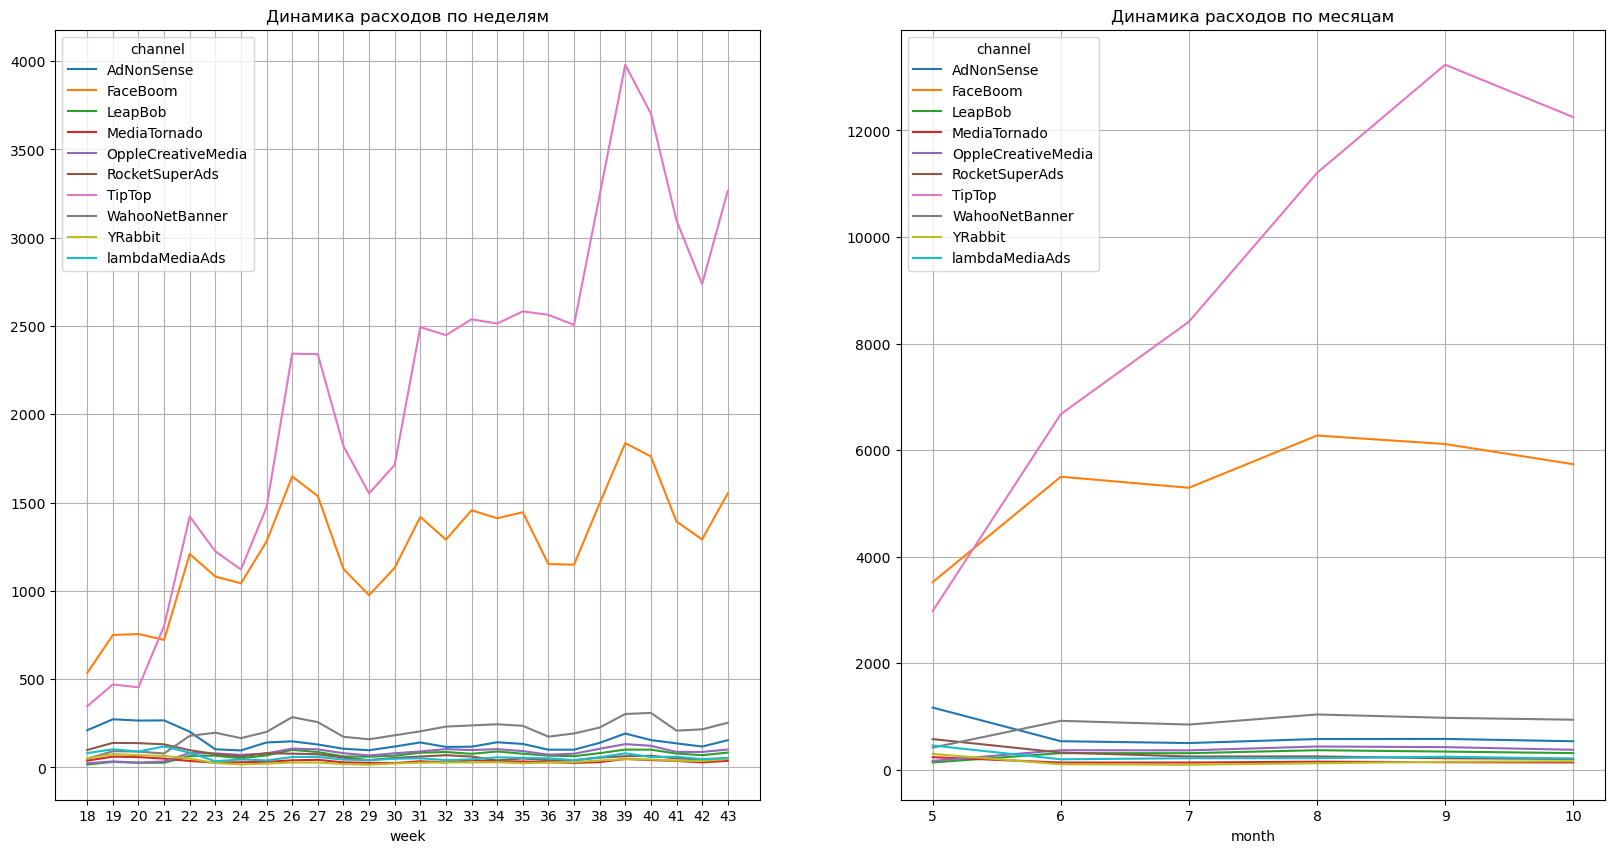

In [33]:
plt.figure(figsize=(20, 10)) 

week_costs = (
    costs
    .reset_index()
    .pivot_table(index='channel', columns='week', values='costs', aggfunc = 'sum')
)

week_costs.T.plot(
    grid=True, xticks=list(week_costs.columns.values), ax=plt.subplot(1, 2, 1))
plt.title('Динамика расходов по неделям')

month_costs = (
    costs
    .reset_index()
    .pivot_table(index='channel', columns='month', values='costs', aggfunc = 'sum')
)

month_costs.T.plot(
    grid=True, xticks=list(month_costs.columns.values), ax=plt.subplot(1, 2, 2))
plt.title('Динамика расходов по месяцам')
plt.show()

По графику динамики вложений в рекламу видно регулярное увеличение вложений в канал TipTop, за исключением октября. В канал FaceBoom, OppleCreativeMedia, WahooNetBanner вложения увеличивались в июне и августе. Для каналов AdNonSense, MediaTornado, RocketSuperAds, lambdaMediaAds и YRabbit максимальные вложения были сделаны в мае, с июня уровень вложений снизился значительно не менялся. Исходя из графика недельных затрат можно сделать вывод, что максимальные вложения  были сделаны на 39-40 неделях года, здесь виден подъем уровня затрат для всех каналов.

#### Расчет средних затрат на привлечение одного пользователя (CAC) из каждого источника

In [34]:
profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean'
).sort_values(by='acquisition_cost', ascending=False)

acquisition_cost
channel                             
TipTop                          2.80
FaceBoom                        1.11
AdNonSense                      1.01
lambdaMediaAds                  0.72
WahooNetBanner                  0.60
RocketSuperAds                  0.41
OppleCreativeMedia              0.25
YRabbit                         0.22
MediaTornado                    0.22
LeapBob                         0.21
organic                         0.00

In [35]:
round(profiles['acquisition_cost'].mean(),2)

0.7

Самые высокие затраты на привлечение пользователя приходятся на канал TipTop 2.8 у.е., что в 2.5 раз превышает затраты следующего по рейтингу затрат каналу FaceBoom(1.11 у.е.). Третим в рейтинке идет канал AdNonSense 1.01 у.е. Самые низкий САС приходится на канал LeapBob 0.21 у.е.

#### Вывод

За период с 1 мая по 27 октября, компания потратила на рекламу 105497 у.е. Максимальные вложения производились на 39-40 неделях года. Линейный рост вложений по месяцам наблюдает только для канала TipTop. Для нескольких каналов наблюдается увеличение вложений в июне и августе. Около половины вложений были направлены в канал TipTop (54751 у.е.) и треть в канал FaceBoom (32445.60 у.е.). Для этих каналов также высок уровень затрат на привлечение одного пользователя (САС) 2.8 у.е. у TipTop и 1.11 у.е. для FaceBoom. Минимальные вложения были сделаны в канал YRabbit (944.22 у.е.), стоимость привлечения одного пользователя составила 0.22 у.е.

### Оценка окупаемости рекламы

Проанализируйте окупаемость рекламы с помощью показателей LTV, CAC и ROI. Так же расчитаем конверсию и удержание пользователе. По условию анализ проводится на 1 ноября 2019 года, эта дата будет являться моментом анализа `observation_date`, в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения, поэтому зададим горизонт анализа `horizon_days` в 14 дней. Органических пользователей выделим в отдельну базу `profiles_organic` по ним рассмотрим конвесрию и удержание.

In [36]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
profiles_organic = profiles.query('channel == "organic"')
profiles = profiles.query('channel != "organic"')
print(f' Число платных пользователей: {len(profiles)}')
print(f' Число органических пользователей: {len(profiles_organic)}')

 Число платных пользователей: 93569
 Число органических пользователей: 56439


#### Анализ окупаемости рекламы

 Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI. Вызовем функцию `get_ltv` для расчёта показателей и при помощи функции `plot_ltv_roi` построим графики.

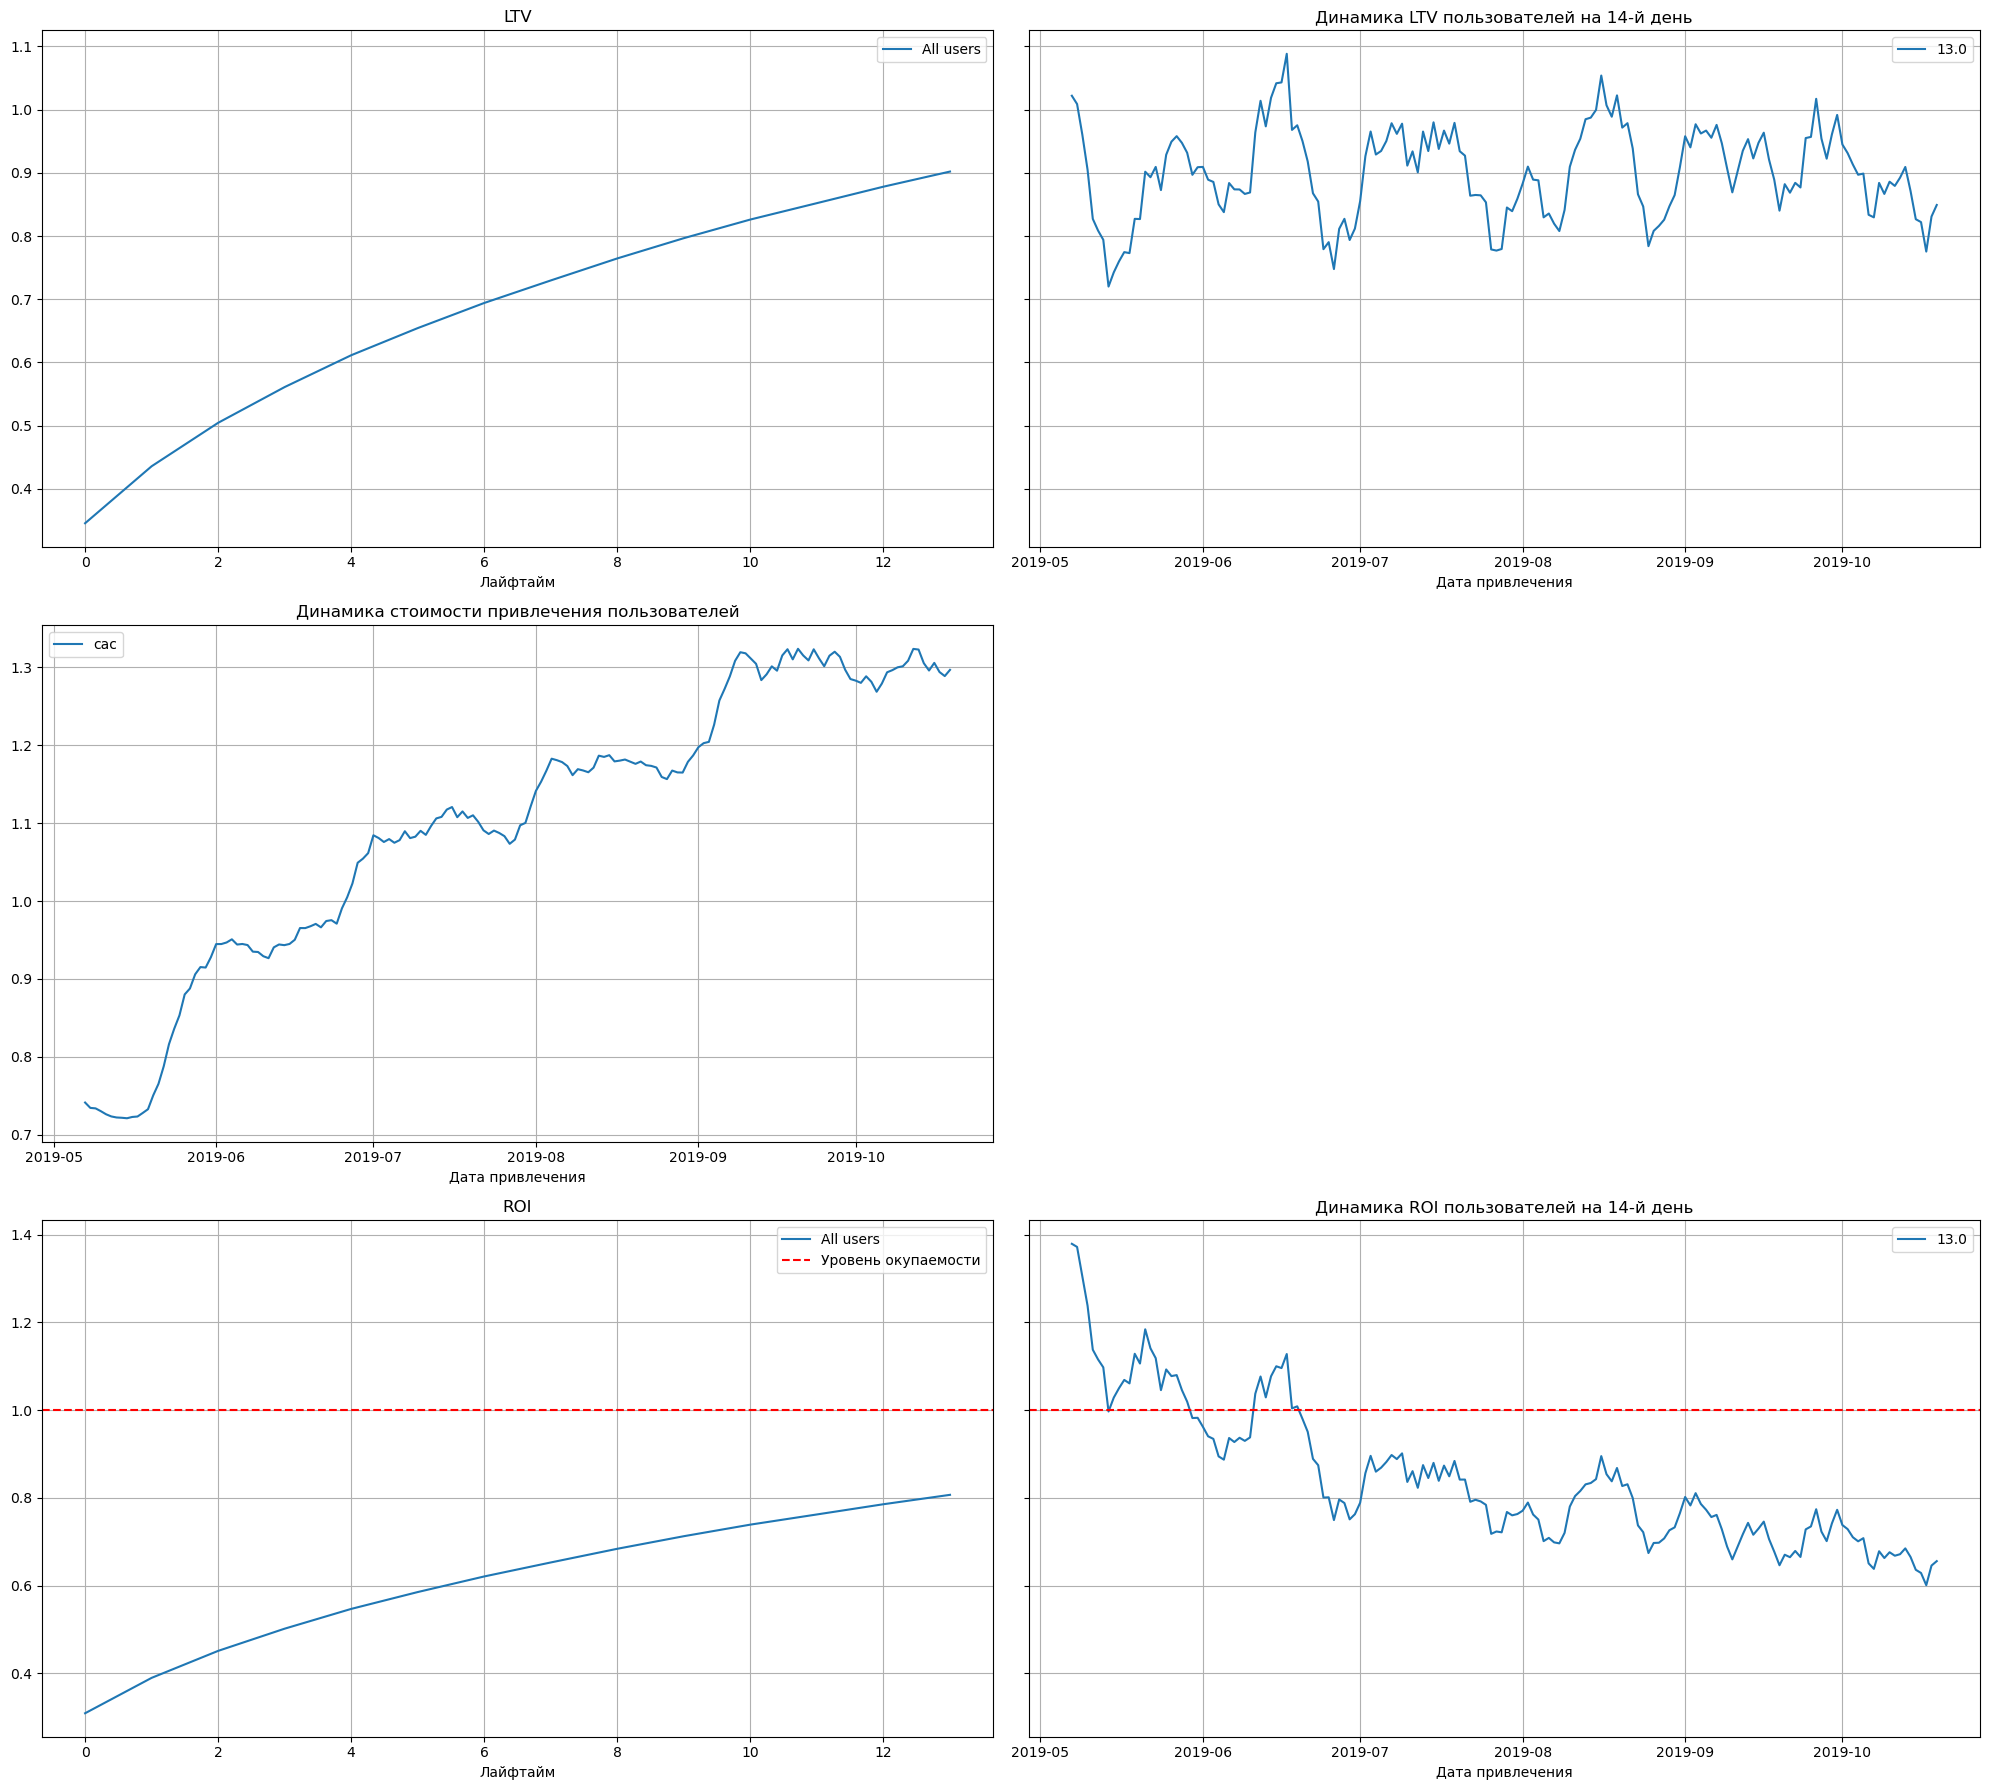

In [37]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам видно, что в среднем LTV на 14 день достигает уровня 0.9 у.е. На протяжении всего периода наблюдей происходят колебания, однако к концу периода пики колебаний становятся чуть менее выраженными. Вложения в рекламу растут на протяжении всего периода. На 14 день реклама не окупается. Первый провал в окупаемости рекламы виден уже в конце мая-начале июня. В динамике окупаемость всё больше отдаляется от уровня окупаемости в отрицательную сторону.

##### Окупаемость рекламы с разбивкой по устройствам

Проверим как меняется окупаемость в зависимости от утройста, с которого происходит вход в приложение.

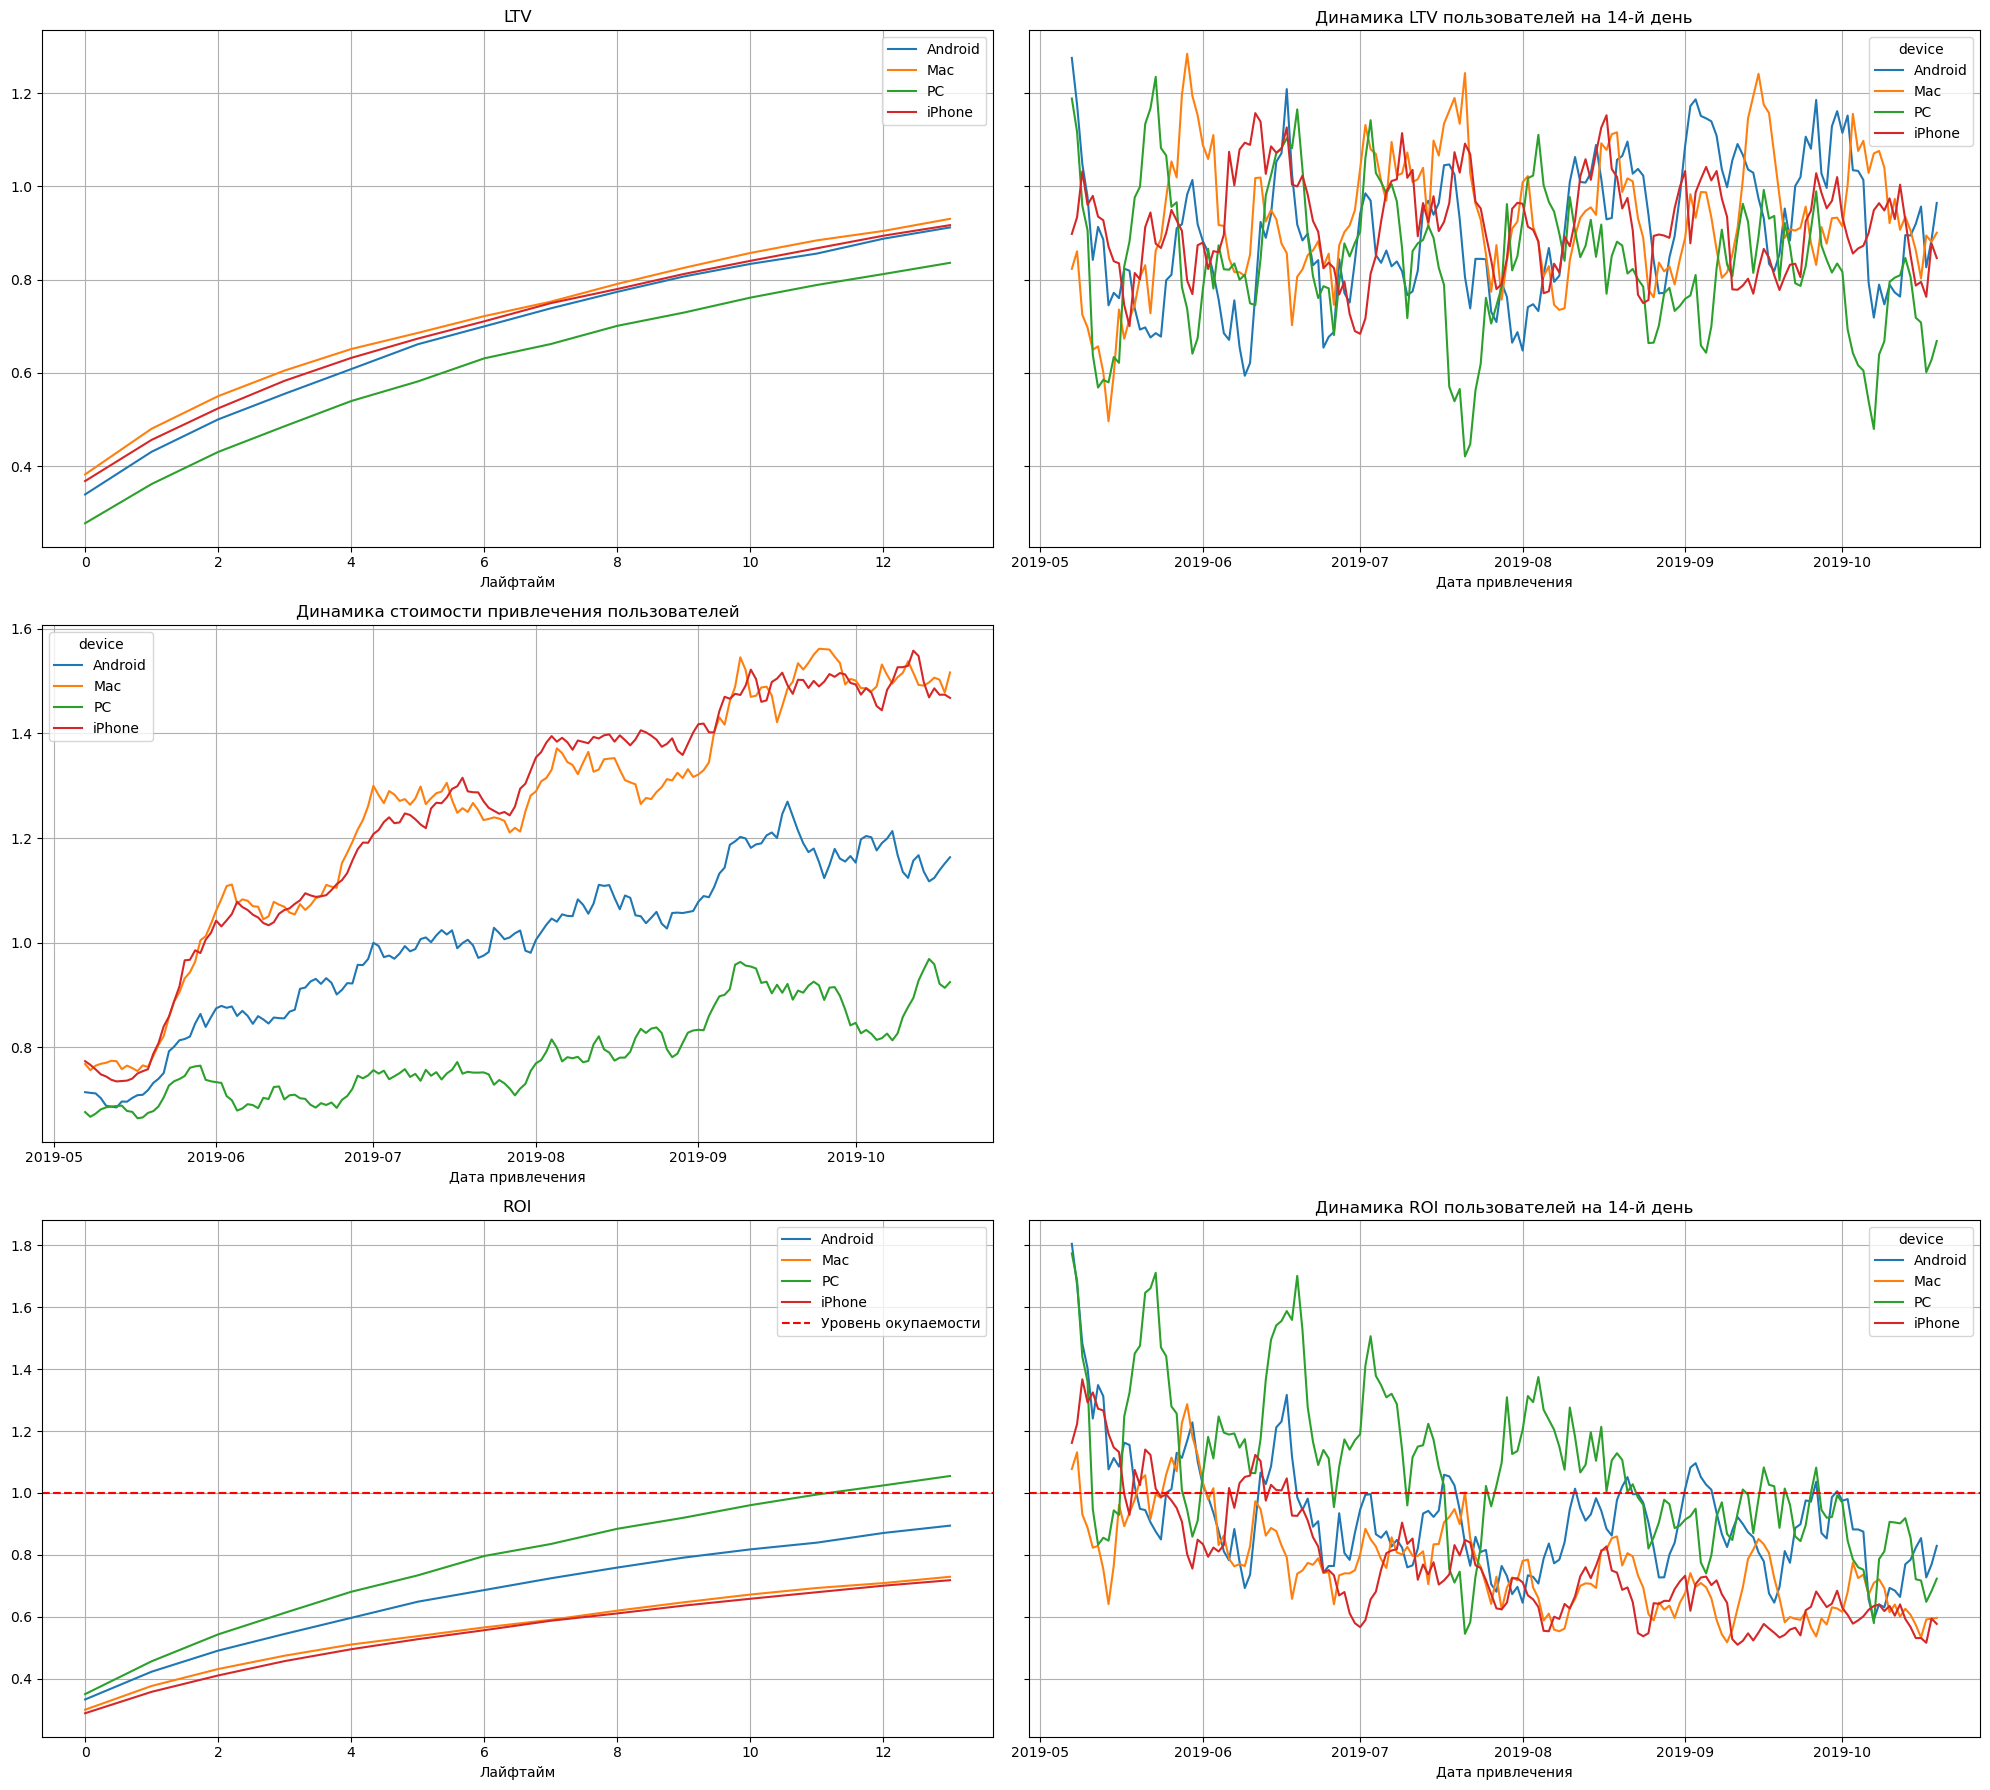

In [38]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions= ['device']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Самый высокий LTV 14 дня у пользователей MAC, самый низкий у PC. В динамике также наиболее заменты провалы в уровне LTV для пользователей PC. Графики вложений направлены одинаково, однако больше всего затрат приходится на MAC и iPhone, меньше всего на PC. К 14 дню вложения окупаются только для пользователей PC, уровень окупаемости Mac и iPhone на уровне 72-73%, у Android пользователей примерно 90%. В динамике окупаемость снижается. К концу наблюдений не окупаются пользователи ни одного из устройств.  

##### Окупаемость рекламы с разбивкой по странам

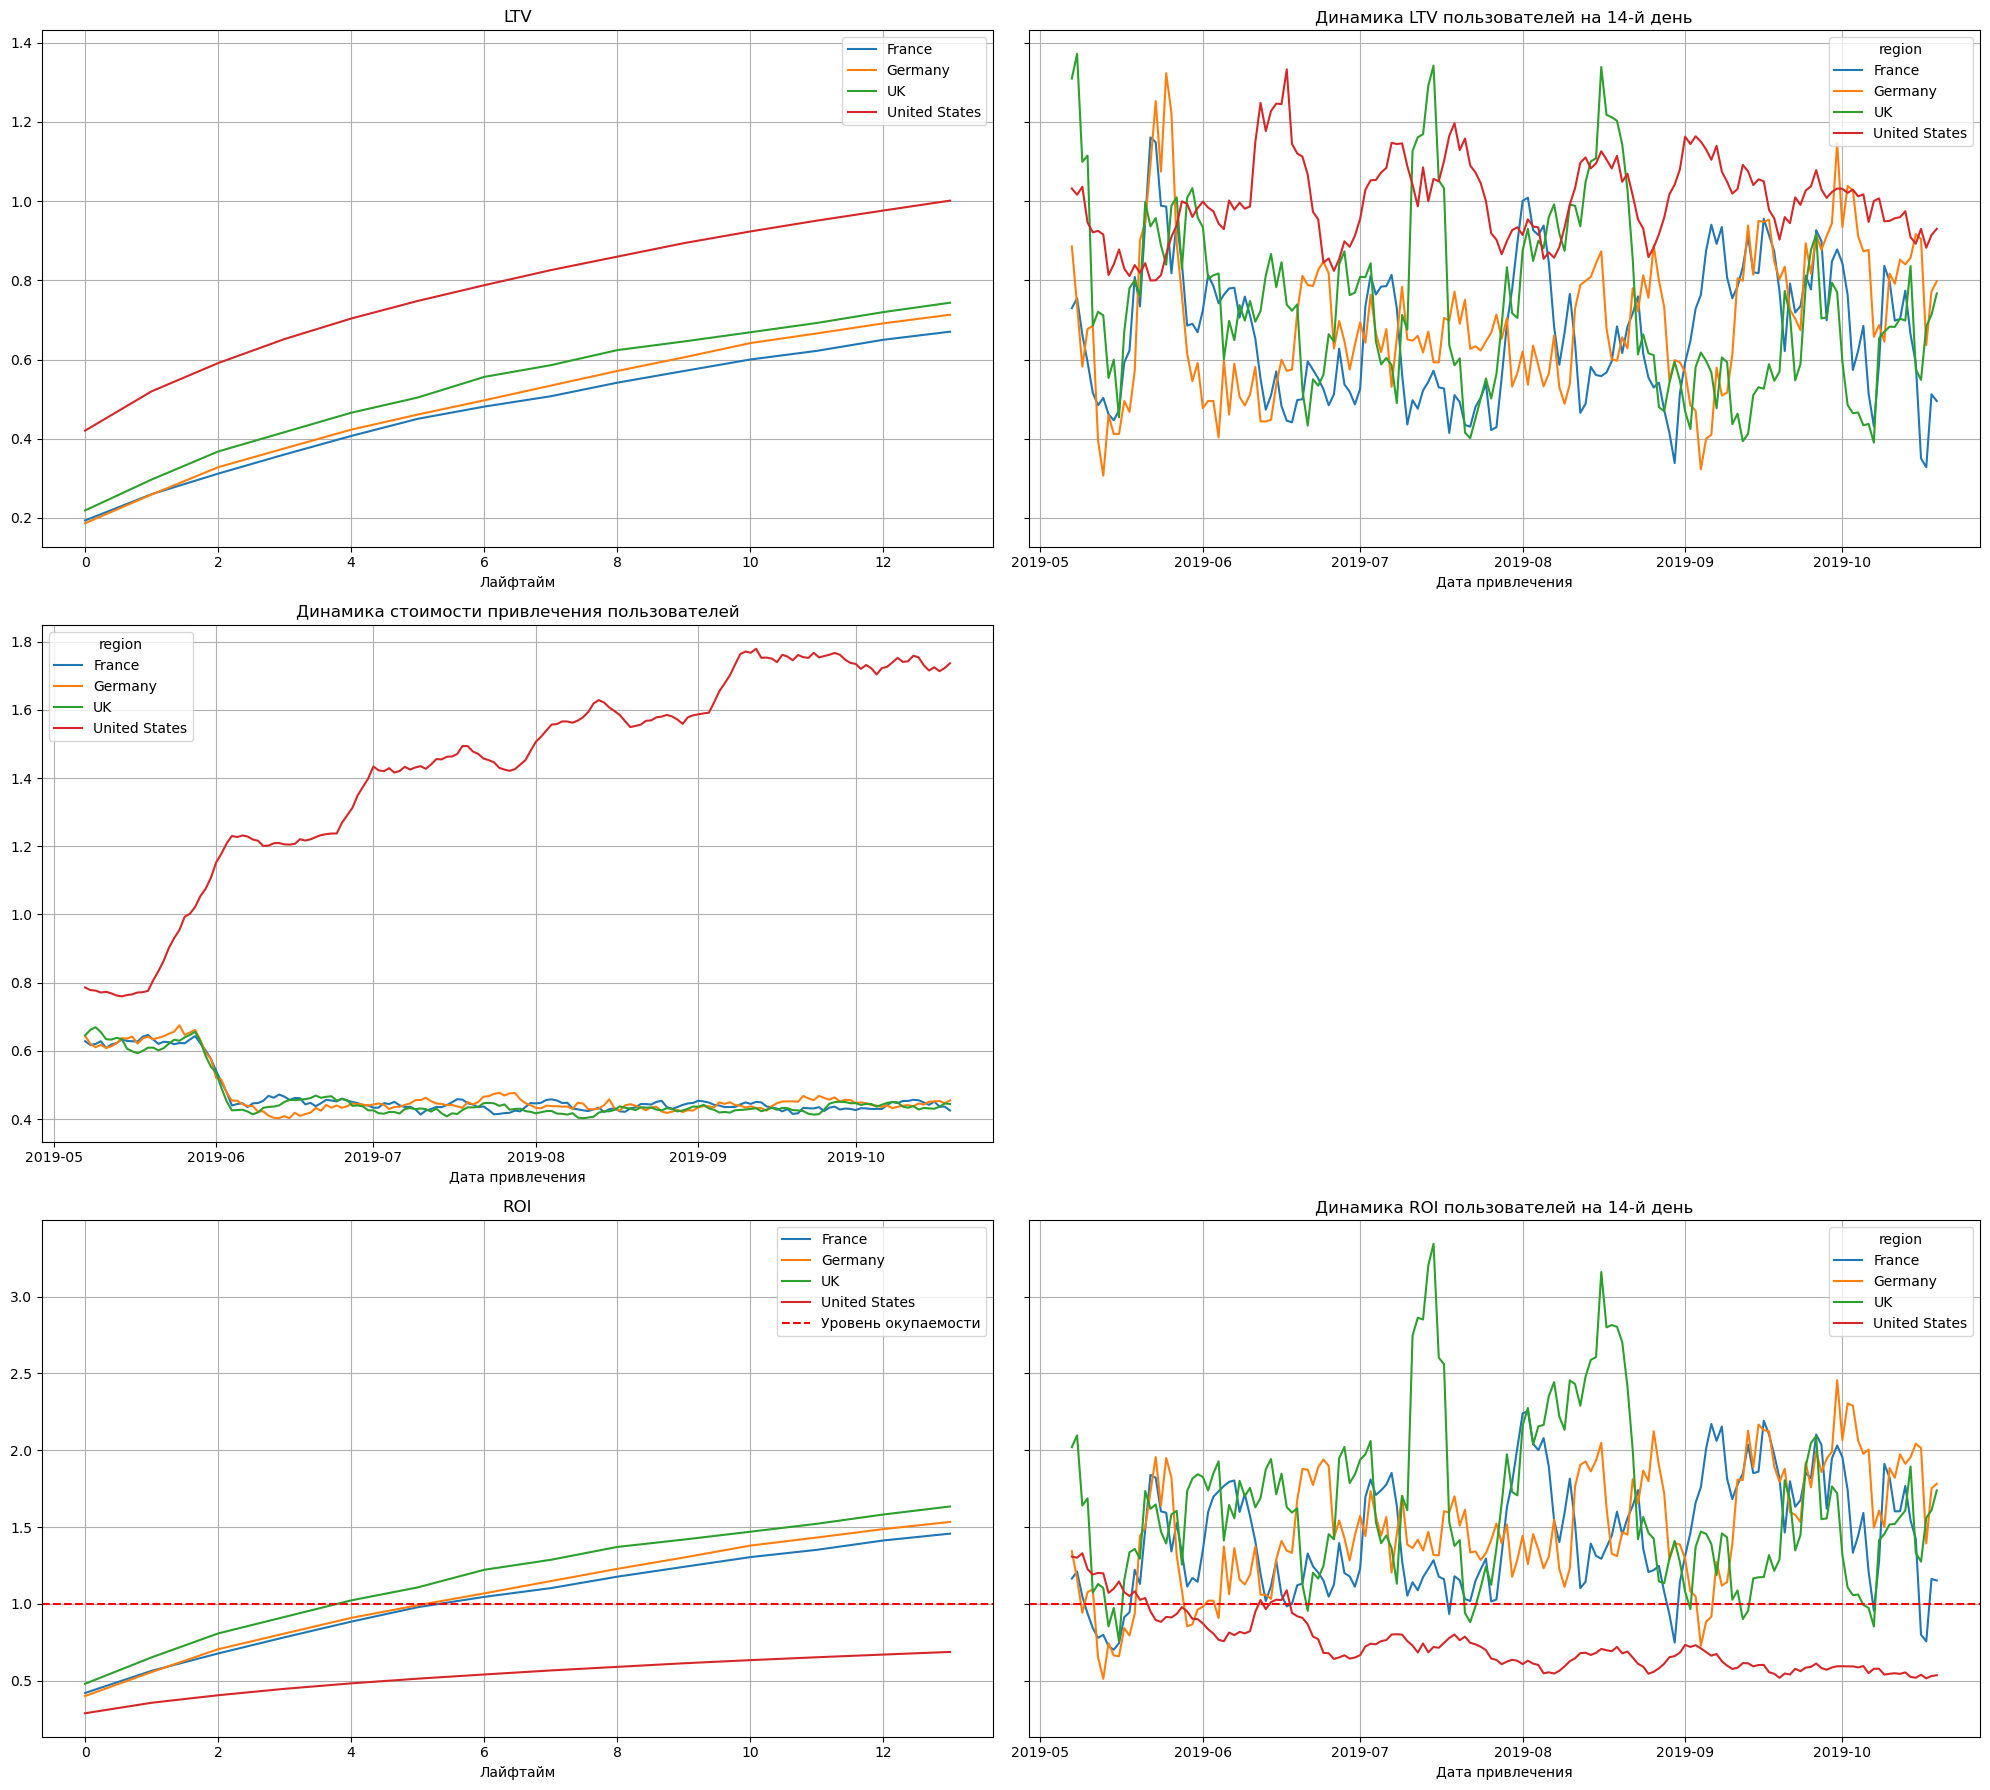

In [39]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions= ['region']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Самым прибыльным регионом является США,однако на них приходится и наибольший уровень затрат на рекламу, окупаемость для пользователей США самая низкая на 14 достигает примерно 65% уровня. Рекламные расходы для других регионов были снижены в конце мая, к 14 дню во всех регионах видна окупаемость на уровне около 150%, в динамике с середины мая пользователи других регионов практически всегда окупались. Особенно заметны всплески окупаемости в Великобритании в середине июля и в августе.

##### Окупаемость рекламы с разбивкой по рекламным каналам

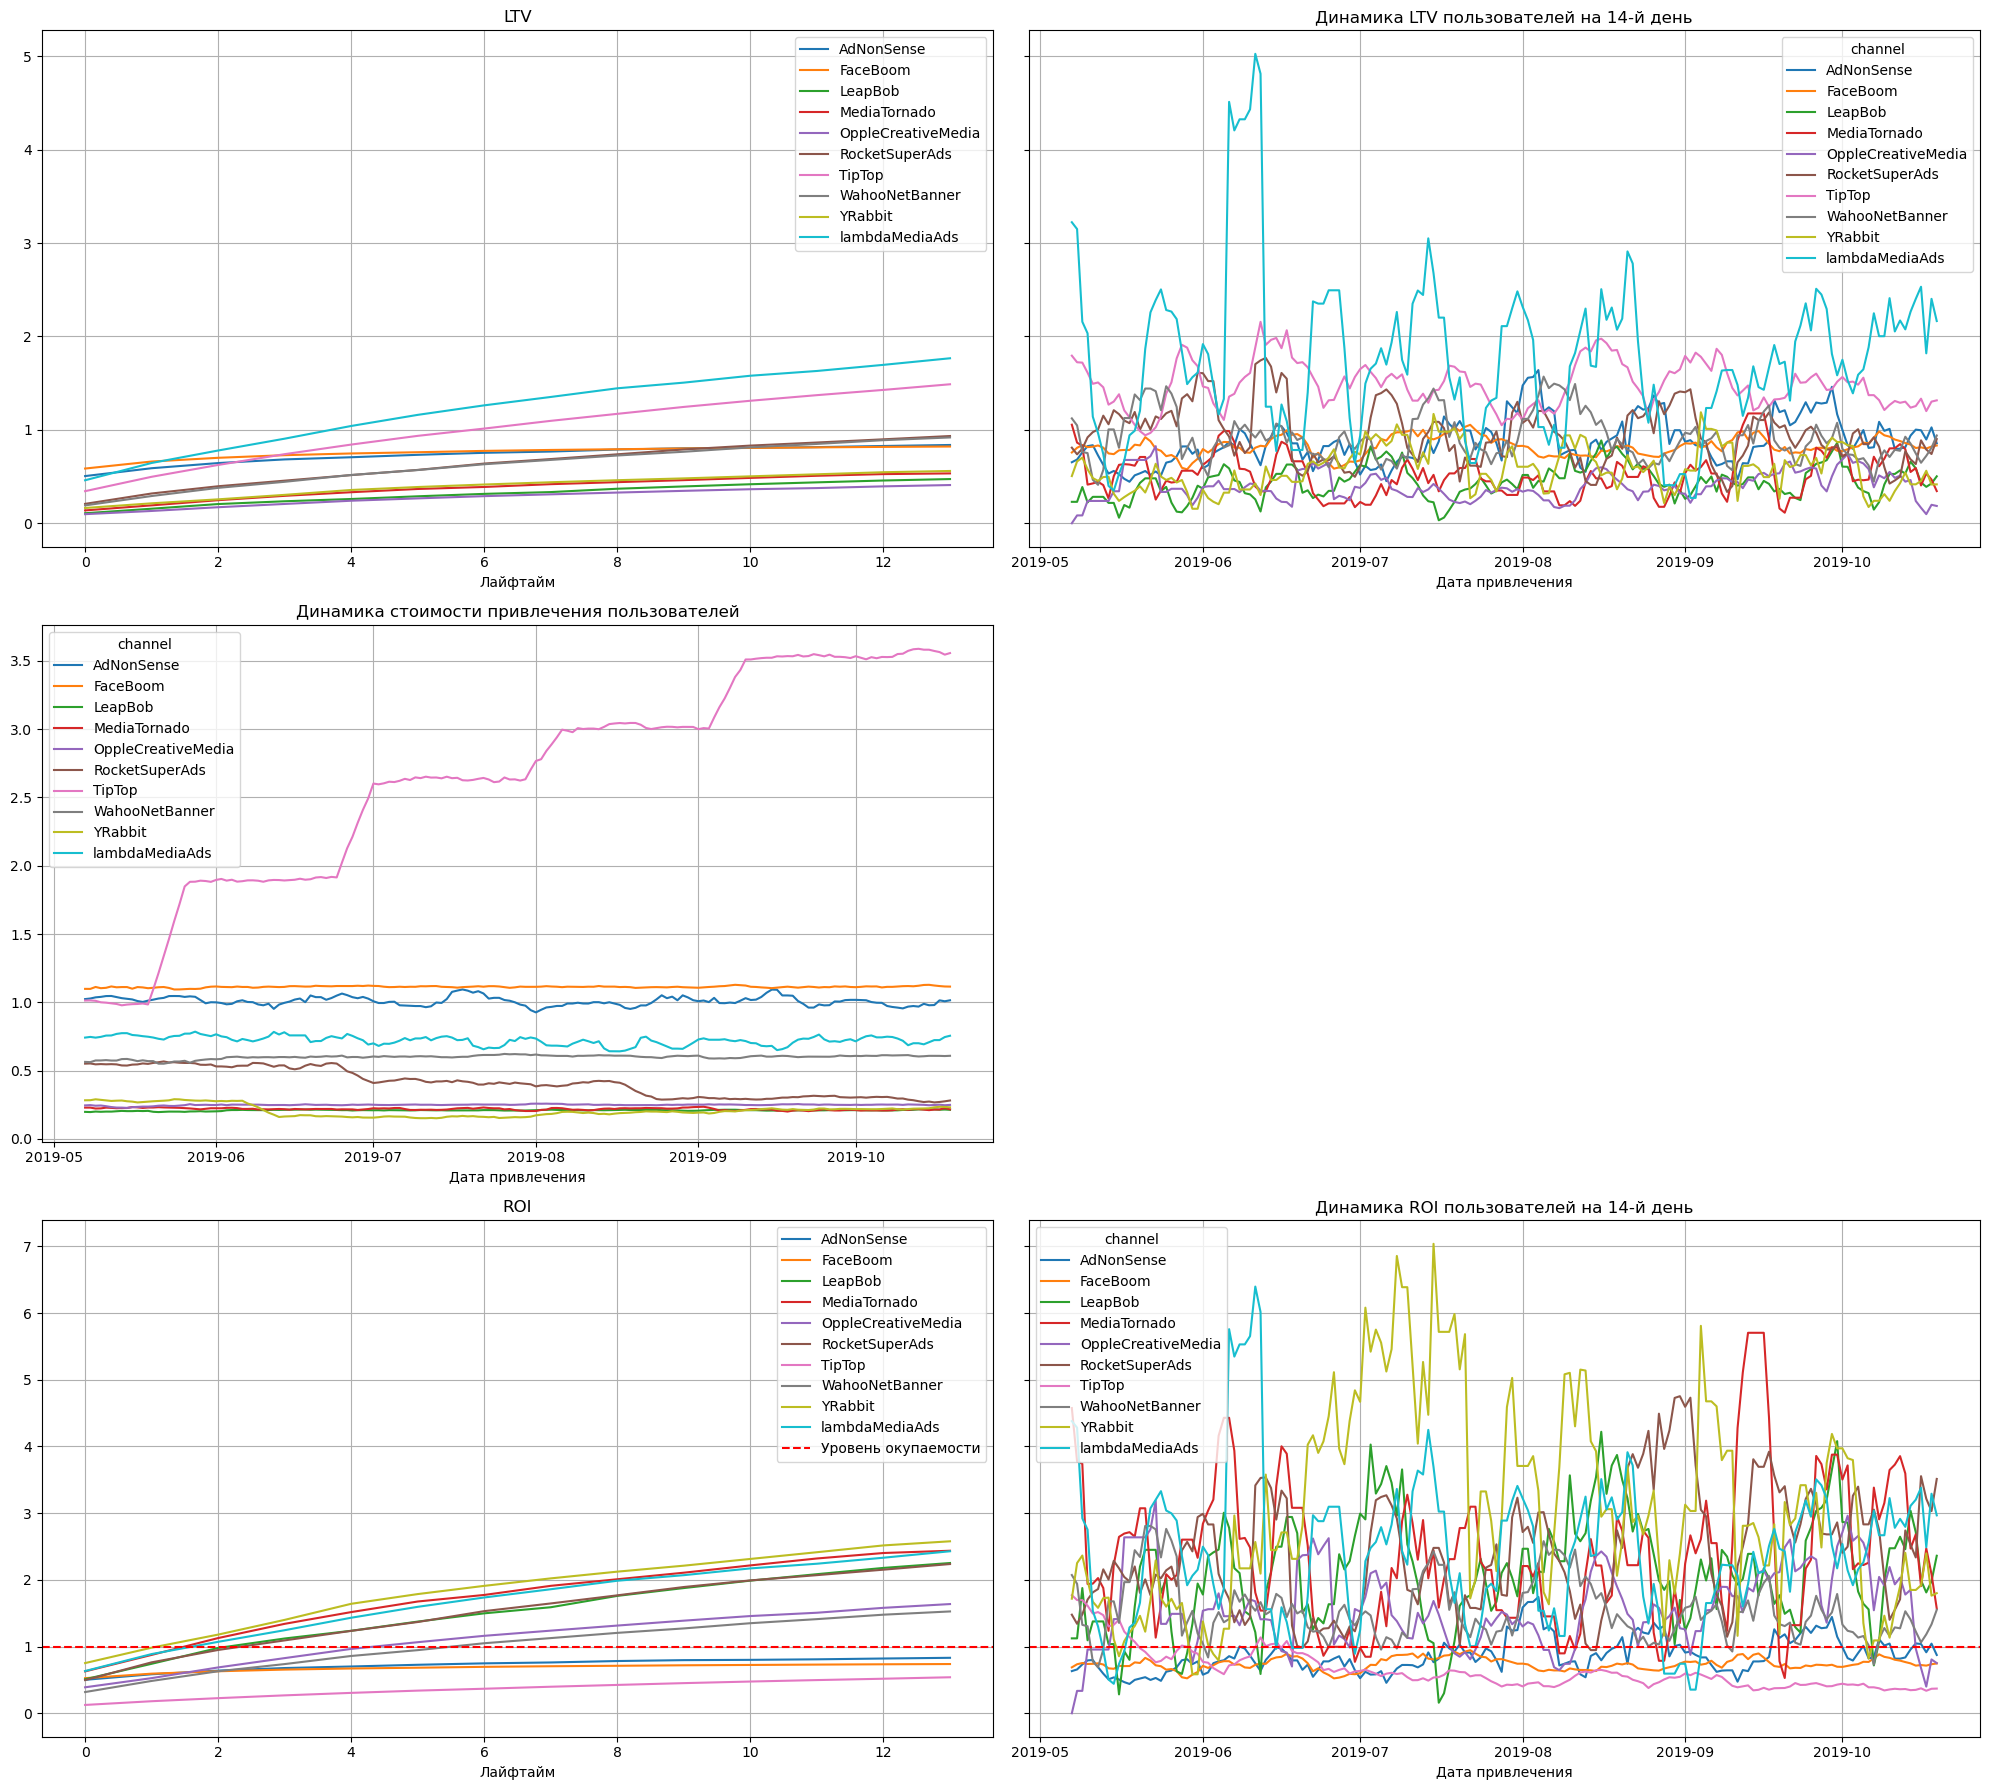

In [40]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions= ['channel']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Наиболее высокий уровень LTV 14 дня у канала lambdaMediaAds, в динамике также наиболее заметны пики LTV этого канала, особенно в начале июня. К 14 дню не окупаются пользователи 3х каналов AdNonSense, FaceBoom и TipTop. Для каналов WahooNetBanner и OppleCreativeMedia уровень окупаемости 14 дня около 150%, для остальных какналов выше 200%. В динамике показатели ROI FaceBoom и TipTop  всегда находились ниже уровня окупаемости. Высокая окупаемость наблюдается в июне для канала lambdaMediaAds и в июле для канала YRabbit. К концу наблюдаемого периода окупаемость снизилась для всех каналов.

#### Конверсия и удержание пользователей

Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим графики конверсии и удержания.

##### Конверсия   и удержание в разбивке по устройствам

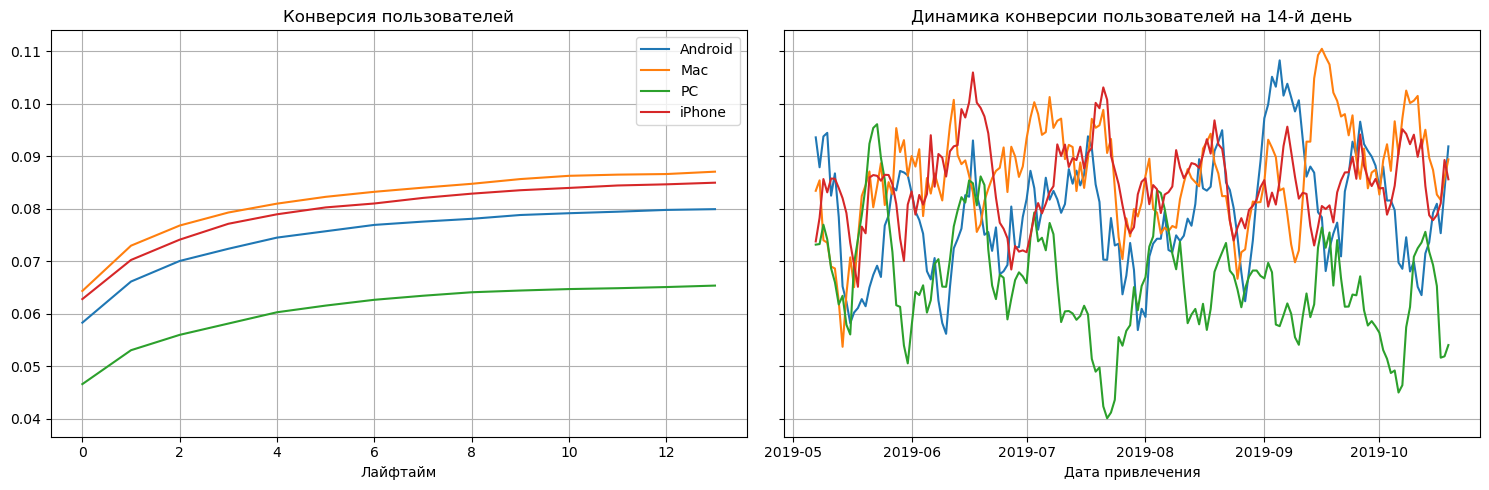

In [41]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions= ['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Самая низкая конверсия у пользователей PC. К 14 дню она составляе всего 6.5% В динамике заметен провал на третьей неделе июля. 

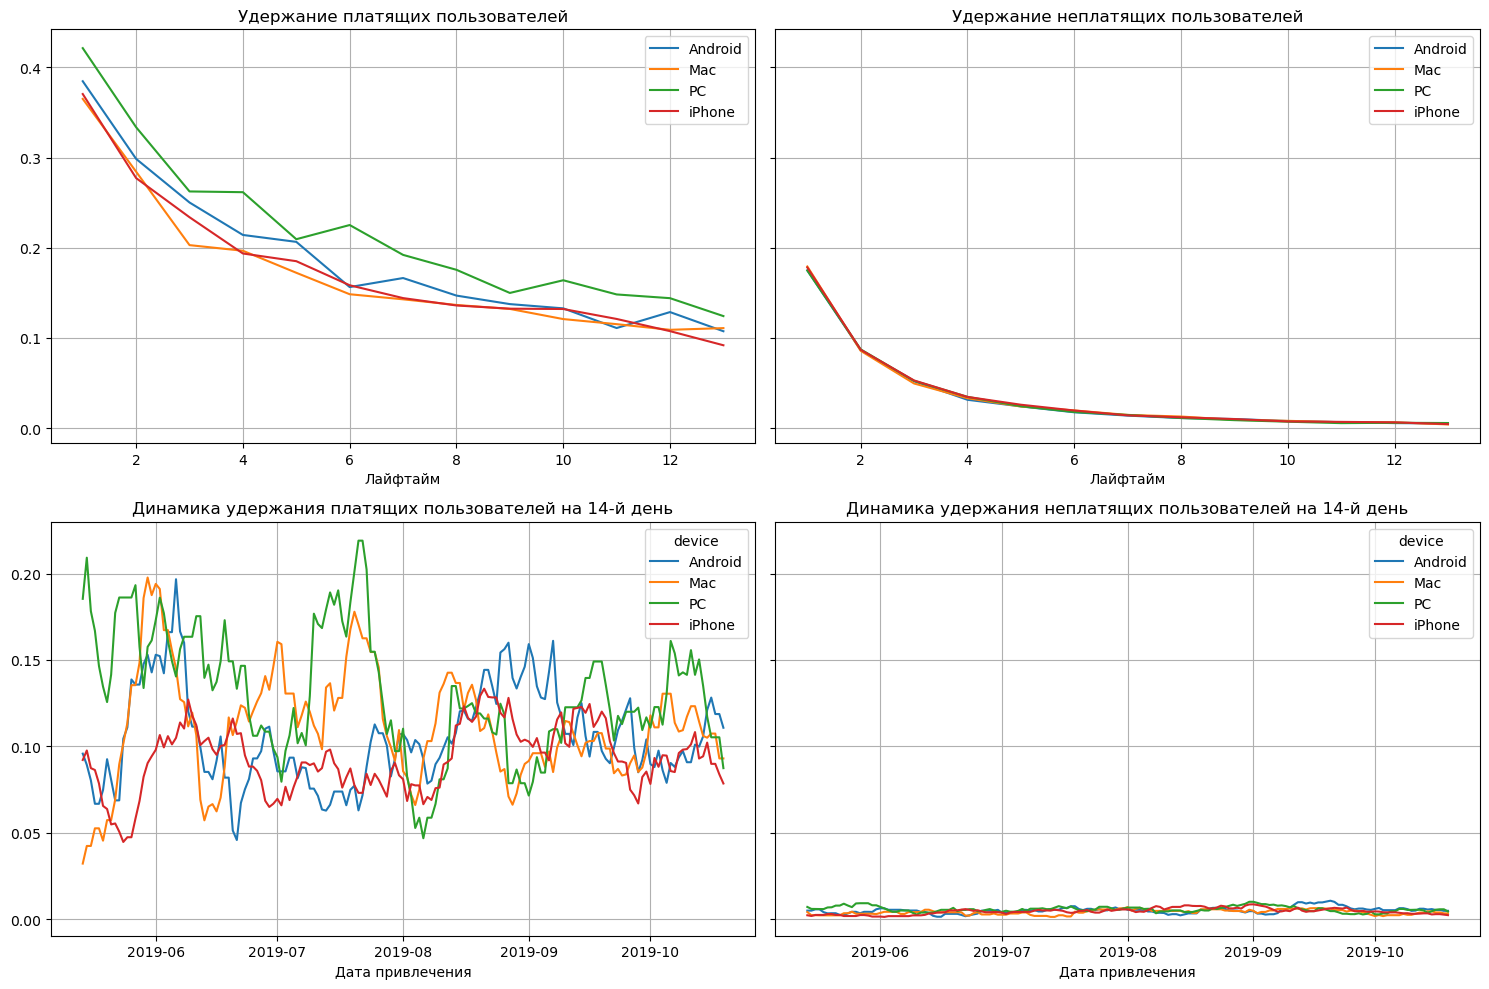

In [42]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days, window=14)  


Удержание пользователей незначительно отличается на всех устройствах. Примерно на третьей неделе июля пользователи PC практические не конвертировались, однако хорошо удерживались.

##### Конверсия   и удержание в разбивке по странам

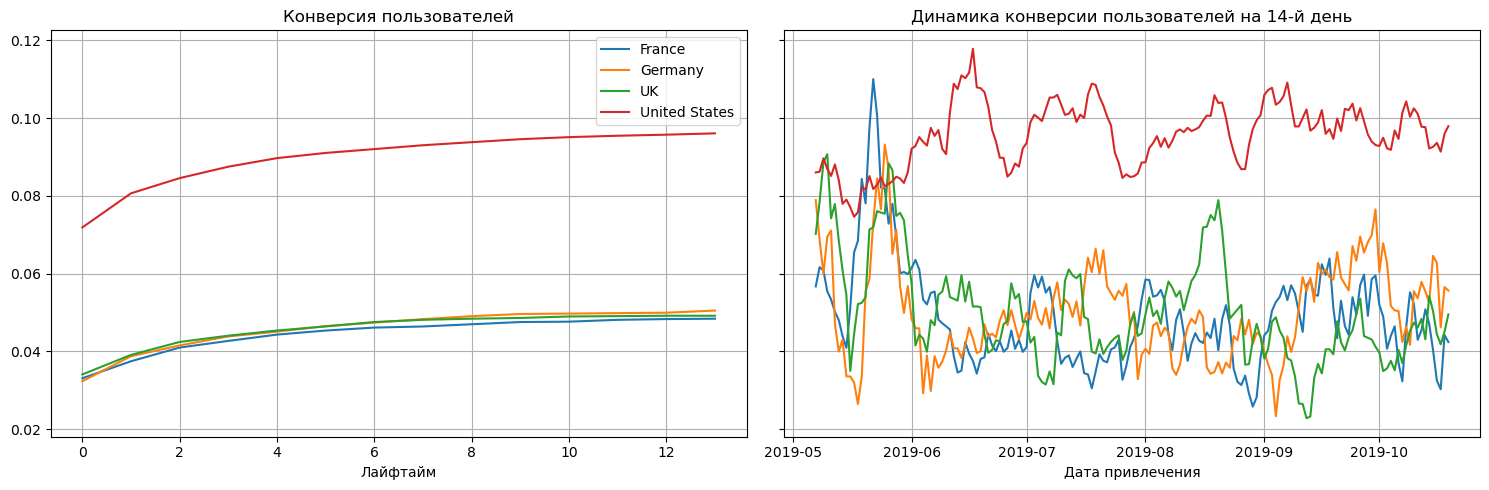

In [43]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions= ['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

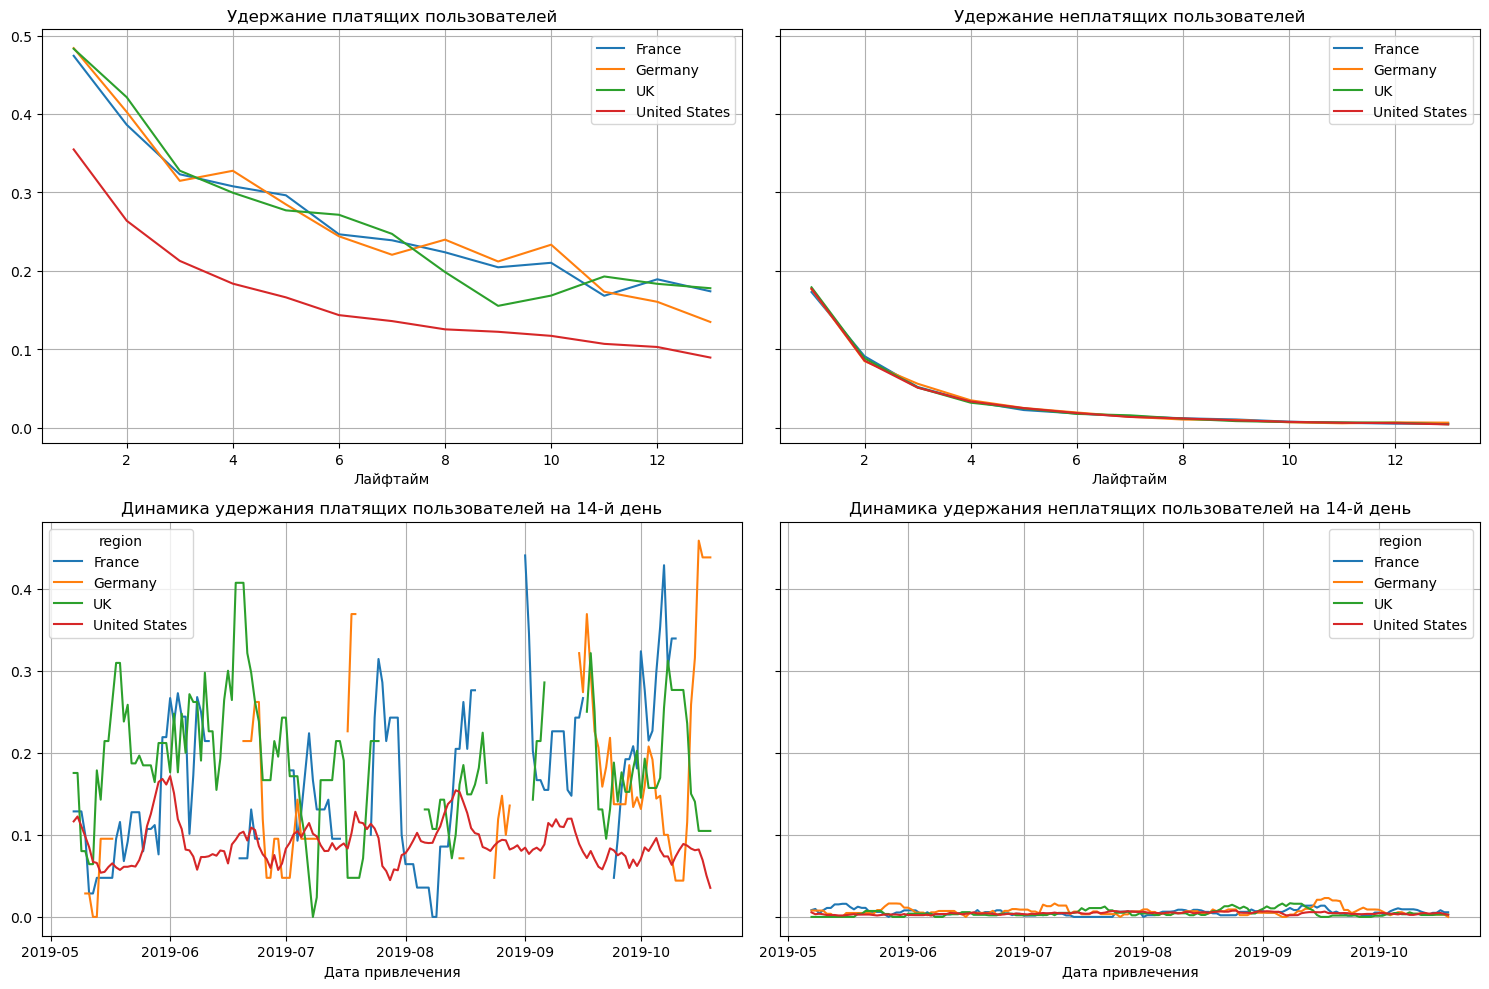

In [44]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days, window=7)  


В США самая высокая конверсия, при этом самый низкий уровень удеражания платящих пользователей. В динамике наблюдалась высокаая конверсия пользователей других устройств в мае.

##### Конверсия   и удержание в разбивке по каналам

Так как пользователи из Франции, Германии и Великобритании схожи по всем показателям и заметно отличаются от США посмотрим отдельно конверсии по региону США и остальным странам.

Проверим конверсию и удержание по пользователям из США в разбивке по каналам

                                     Конверсия США в разбивке по каналам


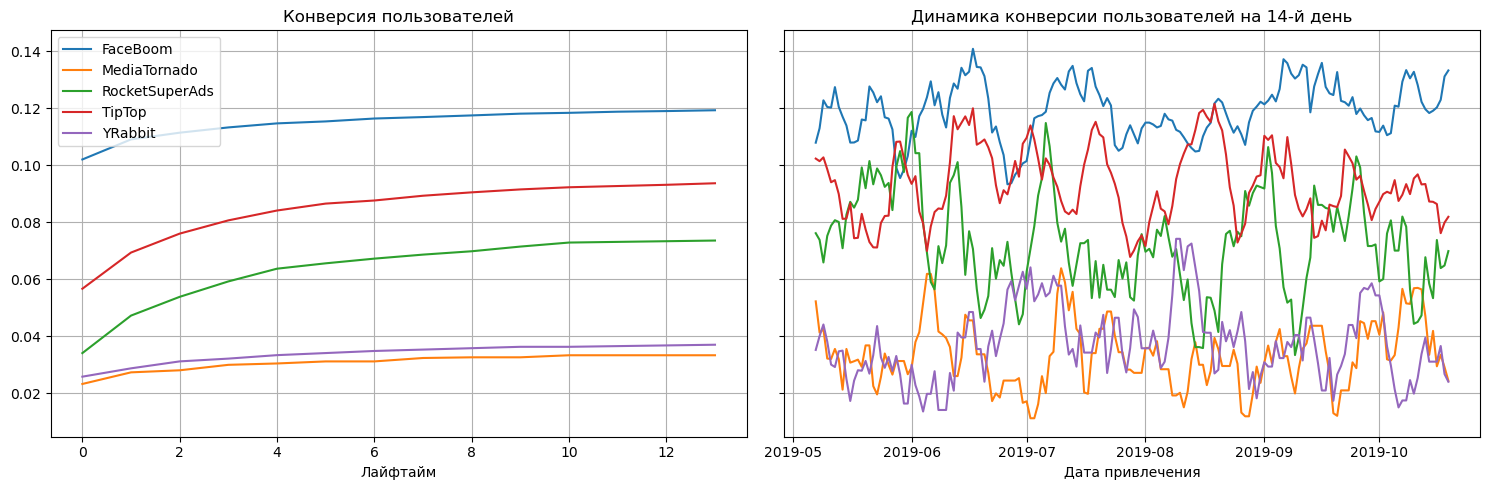

In [45]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('region=="United States"'), orders, observation_date, horizon_days, dimensions= ['channel']
)
print('                                     Конверсия США в разбивке по каналам')
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

                            Удержание пользователей из США в разбивке по каналам


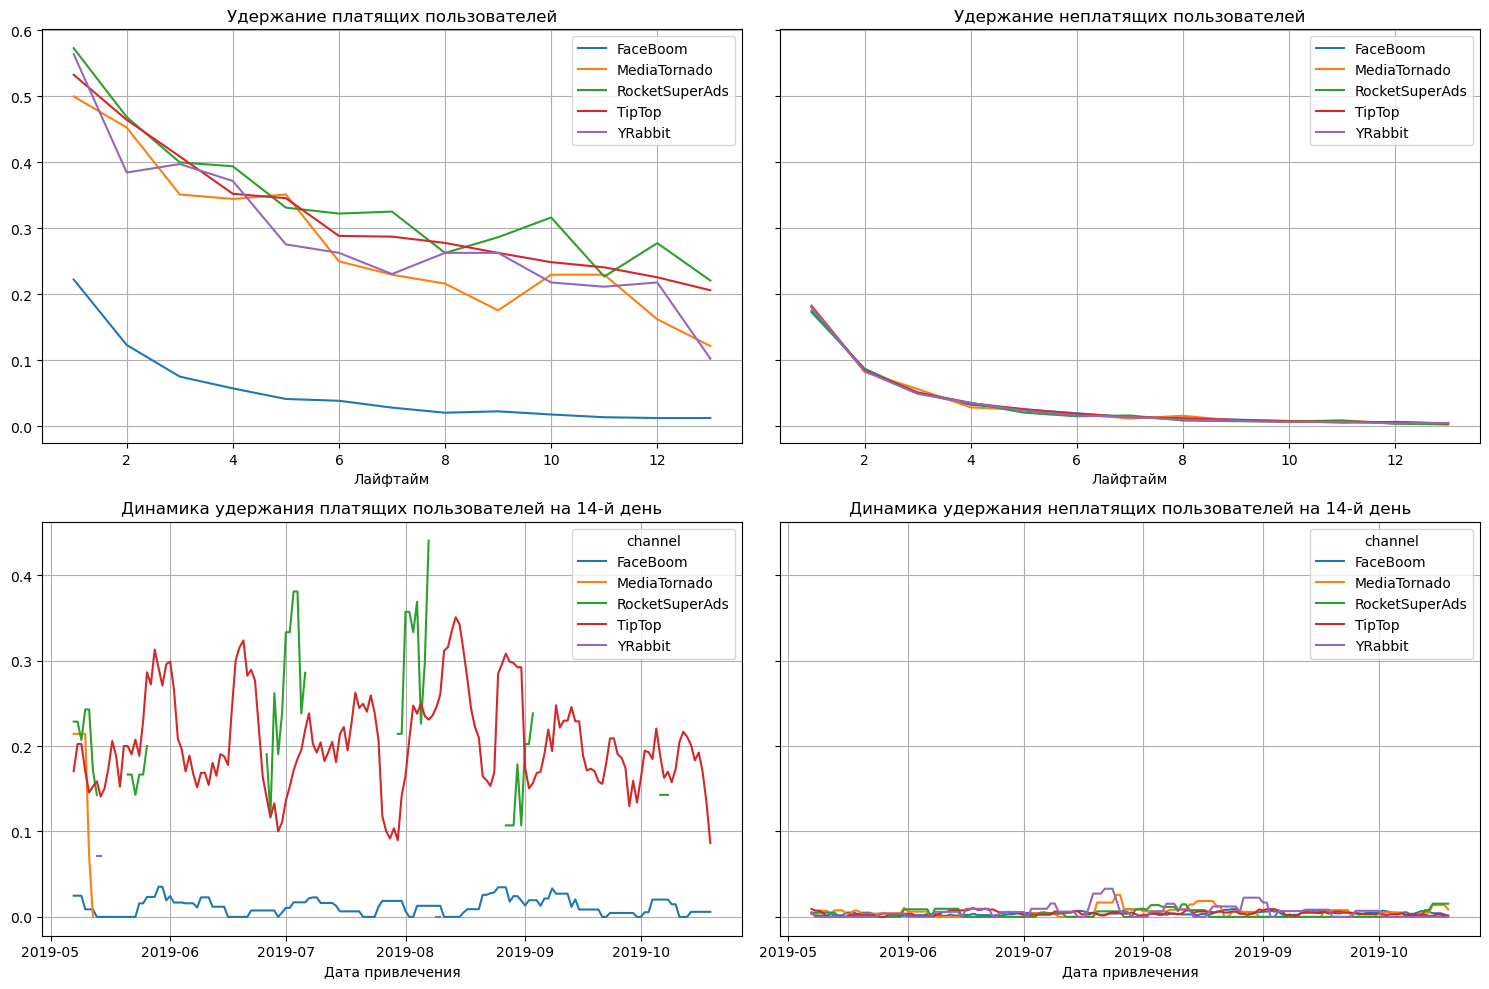

In [46]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('region=="United States"'), visits, observation_date, horizon_days, dimensions=['channel']
)
print('                            Удержание пользователей из США в разбивке по каналам')
plot_retention(retention_grouped, retention_history, horizon_days)  

В США самая высокая конверсия 14 дня у пользователей, пришедших через канал FaceBoom. При этом очень низкий показатель удержания. Для канала TipTop и конверсия и удержание 14 дня на достаточно высоком уровне. Так же неплохие показатели у канала RocketSuperAds. 

                                     Конверсия в Европейских странах в разбивке по каналам


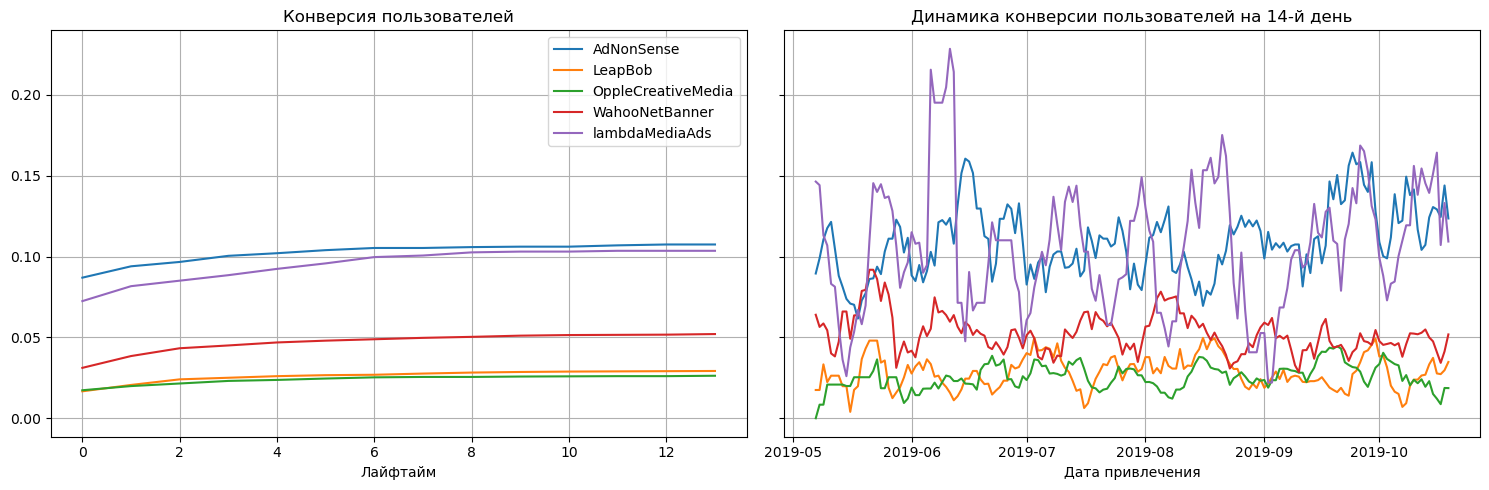

In [47]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('region != "United States" '), orders, observation_date, horizon_days, dimensions= ['channel']
)
print('                                     Конверсия в Европейских странах в разбивке по каналам')
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

                            Удержание пользователей из Европы в разбивке по каналам


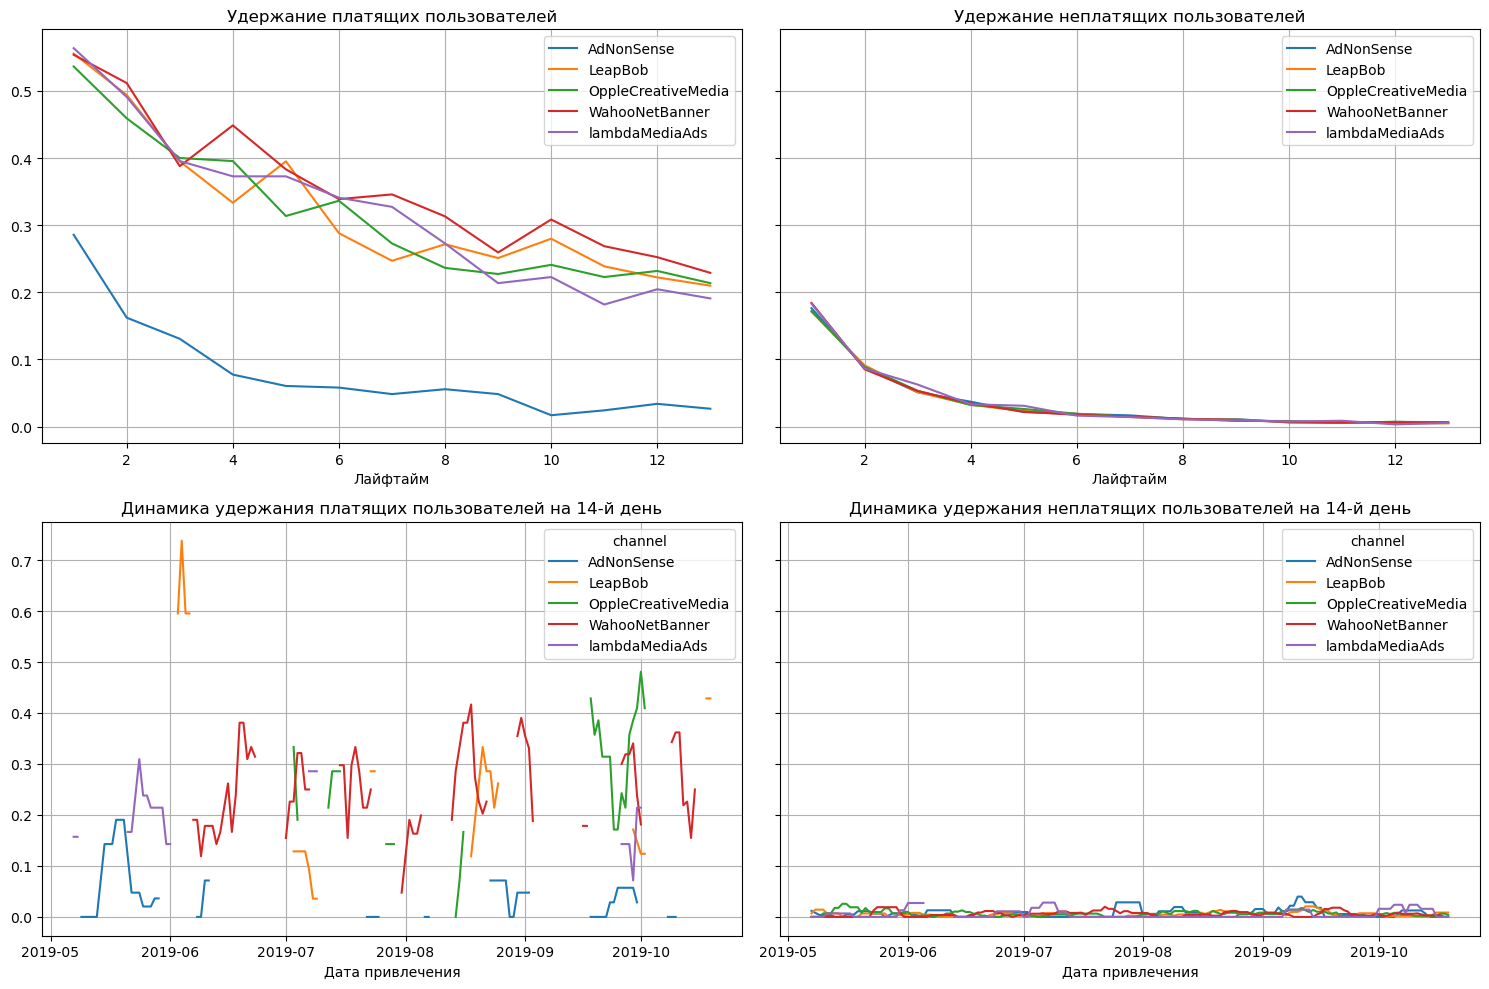

In [48]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('region != "United States"'), visits, observation_date, horizon_days, dimensions=['channel']
)
print('                            Удержание пользователей из Европы в разбивке по каналам')
plot_retention(retention_grouped, retention_history, horizon_days,window=7)  

Аналогично с пользователями из США, в Европе самый высокий показатель конверсии у канала AdNonSense и при этом самый низкий уровень удержания. Хорошая конверсия у канала lambdaMediaAds при этом коэффициент удержания также на достаточно высоком уровне. Однако в динамике удержание платящих клиентов до 14 дня происходит достаточно редко для всех каналов.

##### Конверсия и удержание органических пользователей

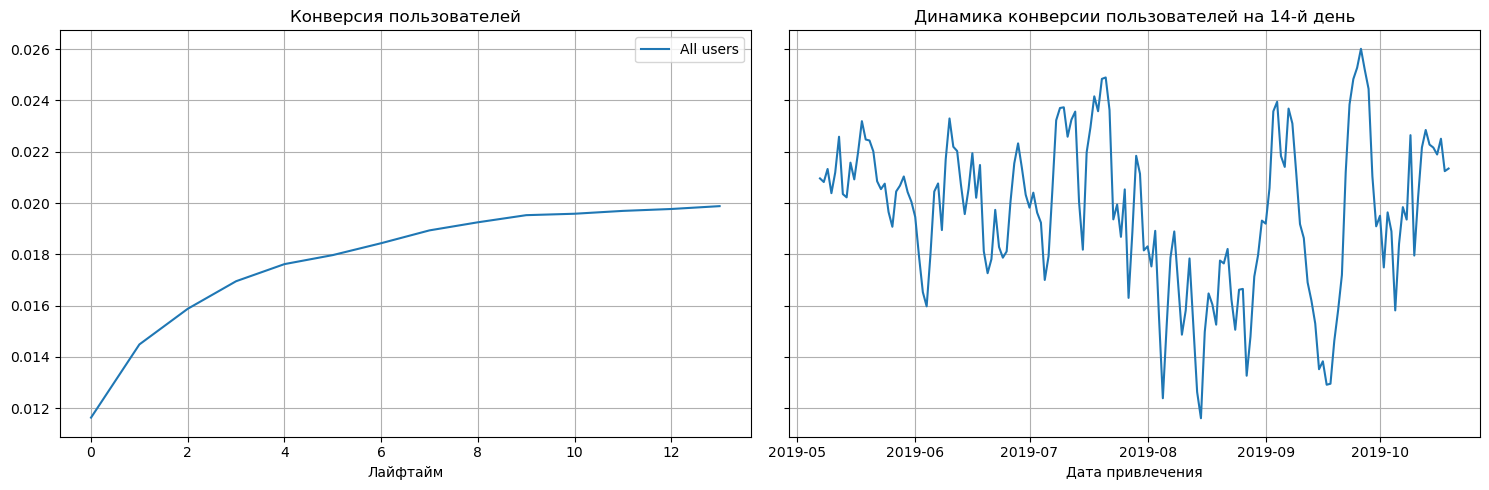

In [49]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_organic, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

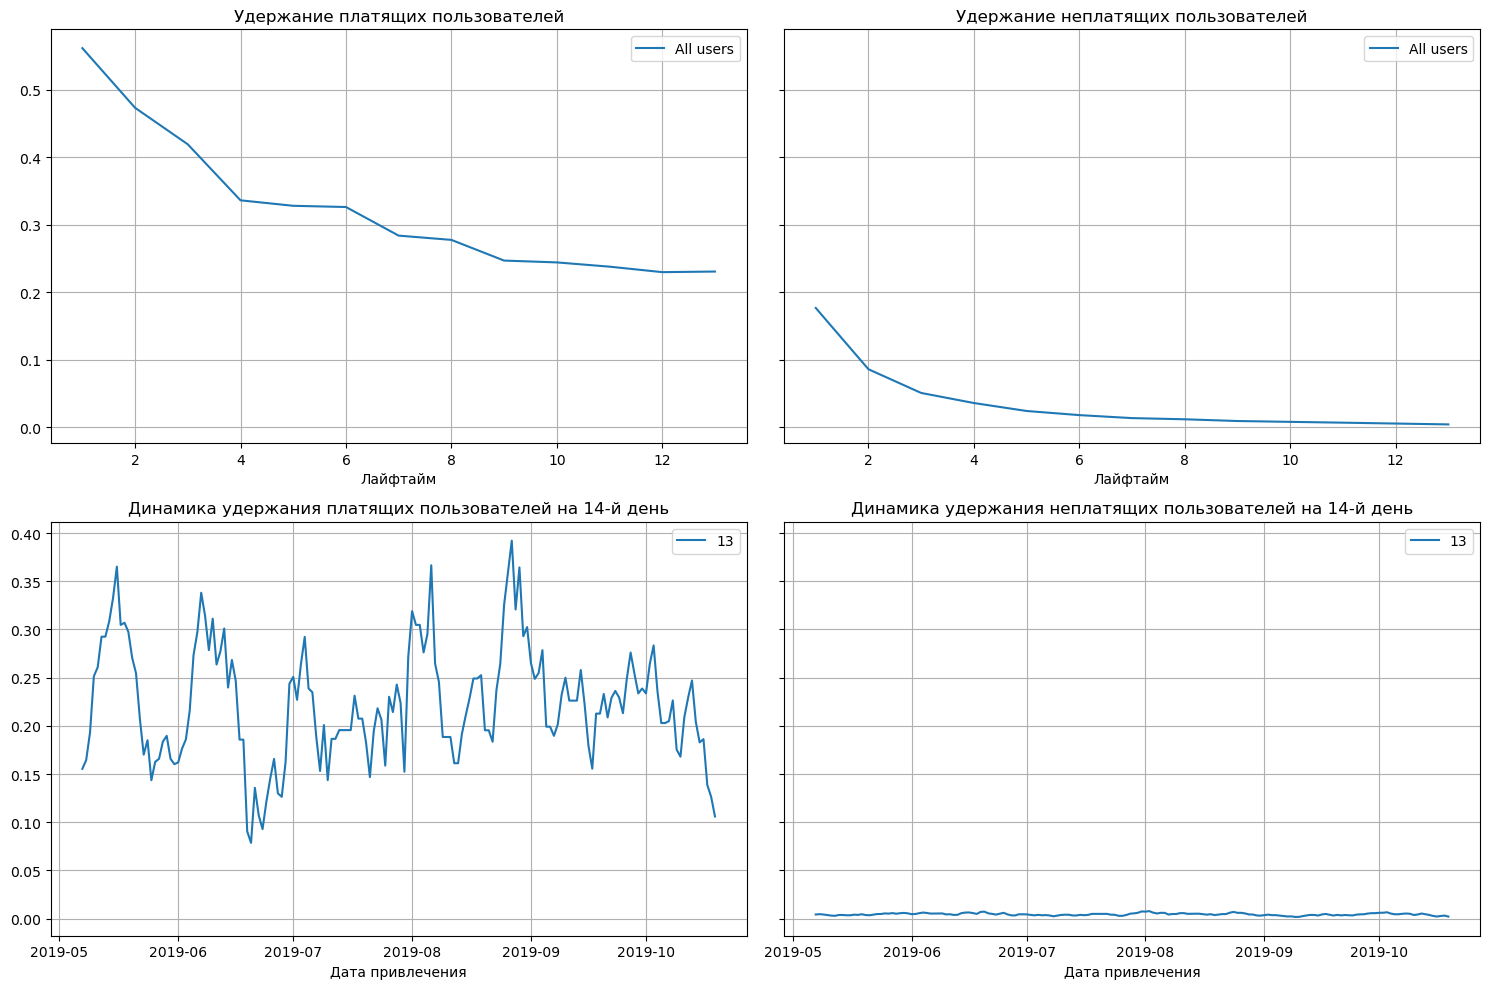

In [50]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_organic, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)  

По графикам видно, что органические пользователи имеют достаточно высокую конверсию. В динамике заметно снижение конверсии в августе. Удержание 14 дня схоже с удержанием пользователей, пришедших через рекламу.

#### Вывод

С помощью рекламы удалось привлечь примерно 62% клиентов. В мае рекламные вложения были невысокими и достигалась окупаемость, однако с увеличением рекламных бюджетов, начиная с середиы июня реклама перестала окупаться и уровень ROI постоянно снижался. В среднем ROI 14 дня составил примерно 80% из чего можно сделать вывод, что реклама не окупается.  
    
На окупаемость больше всего влияют пользователи из США, основные рекламные вложения были направлены именно на рынок США, конверсия достаточно высока чуть меньше 10%, но удержнание 14 дня заметно ниже остальных регионов.  

Среди устройств самыми проблемными в окупаемости являются IPhone и Mac окупаемость 14 дня для них составляет около 72-73%. Уровень удержания 14 дня для пользователей IPhone чуть ниже других устройств так же показатели в динамике заметно ниже. Пользователи PC окупаются к 14 дню, их конверсия ниже остальных, однако они значительно лучше удерживаются.  

Среди каналов в США заметна проблема окупаемости у канала TipTop, в него было вложено больше всего средств, САС составил 2.76, окупаемость 14 дня всего 54%, а САС составляет 2.76 у.е. Но пользователи этого канала имеют неплохую конверсию и удерживаются на уровне около 20%. Самым проблемным можно назвать канал FaceBoom окупаемость 14 дня составляет 74%, по уровню САС он на втором месте среди всех каналов 1.11 у.е. Пользователи этого канала хорошо конвертируются  на 14 день конверсия составляет 12%, однако удержание крайне низко к 14 дня опускается до 0 отметки.  

На рынке Европы не окупается канал AdNonSense, конверсия пользователей этого канала схожа с lambdaMediaAds, при этом пользователи AdNonSense практически не удерживаются, из-за этого окупаемость канала составляет 83%. У канала	lambdaMediaAds 243%.  

Удержание неплатящих пользователей не зависит от региона, устройства и канала привлечения.

Органическим путем за время наблюдения пришли 38% пользователей. Их конверсия к 14 дню составляет 2% и удержание 14 дня 23%.    

Стоит увеличить рекламные вложения для Европы, за исключением канала AdNonSense. Для США пересмотреть бюджеты для каналов FaceBoom и TipTop.

### Общий вывод

Проведен маркетинговый анализ приложения Procrastinate Pro+. Для анализа были получены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года  и проведённых рекламных кампаниях. Исследование проводилось на 1 ноября 2019 года. Согласно бизнес-плану окупаемость должна достигаться на 14 день после привлечения посльзователя.  

Было получено три таблицы, парвая `visits` содержит 309901 наблюдение о посещениях пользователями приложения, вторая `orders` с 40212 наблюдениями о совершенных клиентами покупках и таблица `costs` с 1800 наблюдениями о проведенных рекланых кампаниях.  

Данные были проверены на отсутствие пропусков, явных и неявных дубликатов, названия столбцов приведены к единому стилю, типы данных у столбцов, содержащих информацию о дате и времени приведены к нужному для работы типу данных. Добавлены функции для создания профилей пользователей, расчёта  и анализа маркетинговых показателей (конверсии, удержания, пожизненной стоимости клиента, стоимости привлечения одного клиента и окупаемости инвестиций).

В процессе исследовательского анализа были созданы 150008 профилей пользователей, каждый профиль содержит уникальный идетификатор,регион и устройство с которого совершен первый вход, дату, канал и стоимость привлечения пользователя и признак является ли клиент платящим. 
Большая часть  пришло из США 100002 пользователя. Среди них самый высокий процент платящих 6.9%. На Европейском рынке меньше всего клиентов пришло из Германии 14981 (4.11% платящих), самый низкий процент платящих во Франции 3.8% из 17450 привлечённых, из Великобритании пришло 17575 пользователей (3.98% платящих). 
Пользователи заходили с 4 типов устройст iPhone, Mac, Android и PC.Самым популярным устройством является iPhone 54479 пользователей(6.21% платящих). Самый низкий уровень платящих PC 5.05% среди 30455 пользователей. Среди МАС пользователей самый высокий процент платящих 6.36% из 35032 привлеченных.
Органическим путем в приложение пришли 38% доля платящих 2%. Среди рекламных каналов по привлечению лидирует FaceBoom 	29144 (12.2% платящих). Меньше всего пользователей привлёк канал ambdaMediaAds 	2149 человек (10.47% платящих).

Общая сумма затрат на маркетинг составила 105497 у.е. Половина всех вложений приходится на канал TipTop 54751 у.е. Треть была вложена в FaceBoom (32445.6 у.е.). Самые низкие вложения в канал YRabbit 944 у.е.. В остальные 7 каналов было вложено от 955 до 5151 у.е. Максимальные затраты по всем каналам приходятся на 39-40 недели года. Вложения наращивались в основном в каналы TipTop и FaceBoom. Средняя стоимость привлечения одного клиента для канала FaceBoom 2.86 у.е., для TipToP 1.11. Самая низкая средняя стоимость привлечения у каналов YRabbit, МediaTornado, LeapBob(0.21 - 0.22 у.е.).

В процессе оценки окупаемости рекламы было выявлено, что в заложенные в бизнес-плане 14 дней рекламные каампании окупаются лишь на 80%. Основные расходы приходятся на пользователей США при этом они лучше других стран конвертируются в платящих (конверсия США ~ 10% ), но гораздо хуже удерживаются на 14 день, в связи с этим окупаемость 14 дня в США составляет 65%, для европейских стран ~150%. В разбивке по устройствам окупаются пользователи PC окупаемость 14 дня на уровне 105%. Пользователи Android близки к окупаемости на 95%. Mac и IPhone не окупаются (72-73%). Проблема взязана исключительно с объемом вложений, удержание 14 дня примерно одинаково для всех устройст, конверсии также близки за исключением PC. у них конверсия ниже.
По каналам привлечения не достигают окупаемости каналы, получившие наибольшие вложения AdNonSense, FaceBoom и TipTop. Пользователи этих каналов достаточно имеют достаточно высокую конверсию, но удерживаются из трех лишь пользователи TipTop.  В плане окупаемости, конверсии и удержания хорошо себя проявили пользователи канала lambdaMediaAds на европейском рынке и канала RocketSuperAds в США.

***Рекомендации:***  
Так на основным рынком является США стоит понять причины слабой удерживаемости пользователей, собрать обратную связь и возможно доработать приложение.

Расширить рекламные кампании на рынке европейских стран. 

Пересмотреть рекламную политику по устройствам, увеличить вложения в PC и Android пользователей.

Так как пользователи каналов AdNonSense и FaceBoom плохо удерживаются, скорее всего из этих каналов приходит не целевая аудитория, соответсвенно вложения стоит снизить.  

Перераспределить бюджет между каналами TipTop, lambdaMediaAds, RocketSuperAds вложения в TipTop явно были преувеличены, в связи с этим не удалось достичь окупаемости, но в целом канал перспективный, пользователей с каналов lambdaMediaAds, RocketSuperAds можно считать целевой аудиторией.  
